In [387]:
from utils.cleaner import TextCleaner
c = TextCleaner()

<h4> Dataframe for documents </h4>

In [1]:
import pandas as pd

In [2]:
from utils.cleaner import TextCleaner

c = TextCleaner()

In [3]:
from utils.file_reader import PdfParser


pathes = ["source_materials/ARIA_2021_Brochure.pdf","source_materials/ARIA_Program_2020.pdf"]
pages = [[i for i in range(11, 72)], [i for i in range(8, 55)]]
data = []
for i in range(len(pathes)):
    p = PdfParser(pages[i], pathes[i]) 
    data = data + p.get_parsed_data()

In [4]:
t = pd.read_excel('source_materials/mitacs-cs-projects-20220609-2116.xlsx')
t = t.drop(['project-link-url', 'pagination-url', 'web-scraper-order'], axis=1)
t = t.rename(columns={"project-title": "title", "project-description": "abstract", 'faculty-supervisor': 'supervisor', "academic-institution": 'company'})
t['title'] = t['title'].apply(lambda x: c.text_cleaning(x))
t.dropna(subset = ['abstract'], inplace=True)
t['abstract'] = t['abstract'].apply(lambda x: c.text_cleaning(x))
columns_titles = ['title', 'abstract',"supervisor",  "company"]
t=t.reindex(columns=columns_titles)

In [5]:
df = pd.DataFrame(data)
df

,title,abstract,supervisor,company
0,adapting contextual bandit algorithms to adser...,contextual bandit algorithms are developed to ...,Leonard Wong,[24]7.ai
1,defending white box adversarial examples with ...,as deep neural networks become increasingly co...,Gennady Pekhimenko,AMD
2,modern gameplay test automation with reinforce...,gameplay testing on computer games to help ens...,Amir-massoud Farahmand,AMD
3,reducing data loading time in machine learning...,training of models in machine learning is typi...,Maryam Mehri Dehnavi,AMD
4,hybrid recommender system for applications bas...,collaborative filtering is a widely used metho...,Peter Marbach,AppDirect
...,...,...,...,...
103,multiperson d pose estimation from multiple views,the task of determining the position and orien...,Animesh Garg,Surgical
104,soti snap digital signage and video player,soti customers are using paper and pen based p...,Yashar Ganjali,SOTI
105,synthetic data generation from knowledge graph...,understanding and knowing about rare and trend...,Animesh Garg,Amazon
106,cloud provisioning connector redesign,oktas mission is to improve the connections be...,Eyal de Lara,Okta


In [6]:
frames = [df, t]
  
df = pd.concat(frames)
df = df.reset_index()
df

,index,title,abstract,supervisor,company
0,0,adapting contextual bandit algorithms to adser...,contextual bandit algorithms are developed to ...,Leonard Wong,[24]7.ai
1,1,defending white box adversarial examples with ...,as deep neural networks become increasingly co...,Gennady Pekhimenko,AMD
2,2,modern gameplay test automation with reinforce...,gameplay testing on computer games to help ens...,Amir-massoud Farahmand,AMD
3,3,reducing data loading time in machine learning...,training of models in machine learning is typi...,Maryam Mehri Dehnavi,AMD
4,4,hybrid recommender system for applications bas...,collaborative filtering is a widely used metho...,Peter Marbach,AppDirect
...,...,...,...,...,...
1113,1047,multilingual semantic similarity of unstructur...,to communicate with their end users businesses...,Robert Mercer,Western University
1114,1048,multilingual semantic search engine using mult...,multiple situations require crosslingual searc...,Robert Mercer,Western University
1115,1049,revealing trends in quantum technology with na...,recent years have witnessed a surge of interes...,Yang Liu;Xu Sunny Wang,Wilfrid Laurier University
1116,1050,adding extra constraints to an open platform f...,acculogic develops stateoftheart testers for s...,Dr. Stephen Chen,York University


In [7]:
titles_docs = pd.Series(df['title'])

In [8]:
paper_abstracts_docs = pd.Series(df['abstract'])

In [9]:
df_prof = pd.read_excel('professors_data.xlsx')

In [1491]:
df_prof 

,Unnamed: 0,professor name,paper_abstract,title,date,Unnamed: 5
0,0,Tarek Abdelrahman,we present a compilation flow for the generati...,A Compilation Flow for the Generation of CNN I...,"8 March, 2022",NaN
1,1,Tarek Abdelrahman,Field experiments were carried on cotton durin...,Toxicological evaluation and residual analysis...,2021-01-01 00:00:00,NaN
2,2,Tarek Abdelrahman,Rice husk was used as an adsorbent for the rem...,Adsorption Study of Cadmium (II) and Lead (II)...,2020-08-01 00:00:00,NaN
3,3,Tarek Abdelrahman,the fungicidal residues of certain copper fung...,Residual effect of certain copper fungicides u...,2017-02-10 00:00:00,NaN
4,4,Tarek Abdelrahman,This study explored the heavy metals contamina...,Monitoring and minimizing levels of some heavy...,2017,NaN
...,...,...,...,...,...,...
1446,1446,Andrea Tagliasacchi,when representing a solid object there are alt...,Skeletal Representations and Applications,"25 June, 2014",NaN
1447,1447,Adrian Butscher,we present a method for enforcing manufacturab...,A subtractive manufacturing constraint for lev...,"19 February, 2020",NaN
1448,1448,Adrian Butscher,we present a generalization of the bilateral f...,A General Framework for Bilateral and Mean Shi...,"30 April, 2014",NaN
1449,1449,Adrian Butscher,the gluing technique is used to construct hype...,A Gluing Construction for Prescribed Mean Curv...,"19 February, 2009",NaN


In [10]:
paper_abstarcts = df_prof['paper_abstract']

In [11]:
titles = pd.Series(df_prof['title'])

In [12]:
all_titles = pd.Series(list(titles) + list(titles_docs))

In [13]:
all_paper_abstracts = pd.Series(list(paper_abstarcts) + list(paper_abstracts_docs))

In [14]:
professors = pd.Series(df_prof['professor name'])

In [8]:
abstracts = pd.Series(df_prof['paper_abstract'])
abstracts_const = pd.Series(df_prof['paper_abstract'])
for i in range(len(abstracts)):
    abstracts[i] = abstracts[i] + titles[i]

In [979]:
abstracts = pd.Series(df_prof_small['paper_abstract'])
for i in range(len(abstracts)):
    abstracts[i] = abstracts[i] + titles1[i]

In [983]:
abstracts = abstracts.apply(lambda x: c.text_cleaning(x))

In [220]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

In [221]:
import re
f = open("additional_stop_words.txt", "r")
more_stop_words = f.readlines()
for i in more_stop_words:
    t = i.split()
    stopwords.update(t)

In [986]:
abstracts = abstracts.apply(lambda x : " ".join(word for word in x.split() if word not in stopwords))
abstracts

0      work evaluate existing dialogue relevance metr...
1      existing studies investigated tendency autoreg...
2      introduce doctor xavier bertbased diagnostic s...
3      large powerful neural language models develope...
4      scale perceived distances coreset algorithm fa...
                             ...                        
96     sketchnoting form visual note taking people li...
97     understanding challenges artists face referenc...
98     chronic obstructive pulmonary disease copd ter...
99     posing expressive faces extremely challenging ...
100    inspired data comics paper introduces format r...
Name: paper_abstract, Length: 101, dtype: object

In [987]:
abstracts = abstracts.apply(lambda x: x.split())

In [988]:
from nltk.tag import StanfordPOSTagger

jar = r'C:\canada\document_matching\stanford-pos\stanford-postagger-full-2015-04-20\stanford-postagger.jar'
model = r'C:\canada\document_matching\stanford-pos\stanford-postagger-full-2015-04-20\models\english-left3words-distsim.tagger'

stg = StanfordPOSTagger(path_to_jar=jar, model_filename=model)


In [989]:
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
dict_pos_map = {
    'NN': NOUN,
    'JJ' : ADJ  
}

In [991]:
from nltk import WordNetLemmatizer

lm = WordNetLemmatizer()
adjectives = []
def lemmatizer_on_text(data):    
    data = stg.tag(data) 
    text = []
    for i in range(len(data)):
        if data[i][1] == 'JJ':
            adjectives.append(data[i][0])
        if dict_pos_map.get(data[i][1][:2]) != None:
            if data[i][0] in ['app', 'apps', 'application']:
                text.append('app')
            else:
                text.append(lm.lemmatize(data[i][0], dict_pos_map[data[i][1][:2]]))
    return text

In [992]:
abstracts = abstracts.apply(lambda x: lemmatizer_on_text(x))
abstracts

0      [work, dialogue, relevance, metric, strong, de...
1      [study, tendency, autoregressive, language, mo...
2      [doctor, xavier, bertbased, diagnostic, system...
3      [large, powerful, neural, language, model, res...
4      [scale, distance, coreset, algorithm, factor, ...
                             ...                        
96     [sketchnoting, form, visual, note, people, ide...
97     [challenge, artist, reference, imagery, drawin...
98     [chronic, obstructive, pulmonary, disease, cop...
99     [expressive, face, challenging, typical, facia...
100    [inspired, data, comic, paper, format, reporti...
Name: paper_abstract, Length: 101, dtype: object

In [993]:
f = open('prof_abstracts_small.txt', 'w')
for i in abstracts:
    f.write(" ".join(i))
    f.write('\n')
f.close()

In [21]:
f = open('prof_abstracts.txt', 'w')
for i in abstracts:
    f.write(" ".join(i))
    f.write('\n')
f.close()

In [15]:
import pandas as pd

abstracts = []
f = open('prof_abstracts.txt', 'r')
for i in f.readlines():
    abstracts.append(i.rstrip('\n')) 
#abstracts = pd.Series(abstracts)   
f.close()

In [36]:
len(abstracts) #1451-1559 - ARIA abstracts

1451

In [16]:
f = open('lemmatized_text.txt', 'r')
u = f.readlines()
for i in u:
    abstracts.append(i.split())
abstracts = pd.Series(abstracts)
f.close()

In [1505]:
len(titles)

1451

In [23]:
f = open('prof_adjectives.txt', 'w')
for i in adjectives:
    f.write(i)
    f.write('\n')
f.close()

In [17]:
adjectives = []
f = open('prof_adjectives.txt', 'r')
for i in f.readlines():
    adjectives.append(i)
f.close()

In [18]:
f = open('adjectives.txt', 'r')
u = f.readlines()
for i in u:
    adjectives.append(i)
adjectives = [x.rstrip('\n') for x in adjectives]
f.close()

In [24]:
def replace_ngram(x, ngram_array):
    for gram in ngram_array:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [1523]:
abstracts

0       present compilation flow generation cnn infere...
1       field experiment cotton season aldakahlia alfa...
2       rice husk adsorbent removal cd aqueous solutio...
3       fungicidal residue copper fungicide copper oxy...
4       study heavy metal contamination drinking water...
                              ...                        
2564    [end, user, business, document, letter, notice...
2565    [multiple, situation, crosslingual, lawyer, li...
2566    [recent, year, surge, interest, research, dire...
2567    [acculogic, stateoftheart, tester, electronic,...
2568    [casebank, service, chronicx, airline, industr...
Length: 2569, dtype: object

In [19]:
abstracts = abstracts.apply(lambda x: x.split() if type(x) == str else x)

In [20]:
vocab = []
words_frequences = {}

In [314]:
len(abstracts)

1451

In [21]:
import nltk

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder =nltk.collocations.BigramCollocationFinder.from_documents(abstracts)
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
bigrams = [" ".join(list(bigram[0])) for bigram in bigram_scores if len(bigram[0][0]) > 1]
bigrams

['artificial intelligence',
 'computer vision',
 'partner organization',
 'natural language',
 'reinforcement learning',
 'language processing',
 'neural network',
 'mobile device',
 'deep learning',
 'mobile app',
 'machine learning',
 'deep neural',
 'generative model',
 'large number',
 'goal project',
 'research project']

In [22]:
from collections import Counter

trigrams = []
whole_text = []
for abstract in abstracts:
    whole_text = whole_text + abstract

ngrams = Counter(nltk.ngrams(whole_text, 3))

for ngram, freq in ngrams.most_common(9):
    trigrams.append(" ".join(ngram))
trigrams

['natural language processing',
 'deep neural network',
 'convolutional neural network',
 'generative adversarial network',
 'machine learning model',
 'recurrent neural network',
 'graph neural network',
 'machine learning technique',
 'language processing nlp']

In [25]:
tokenized_docs = abstracts.apply(lambda x : " ".join(word for word in x))
tokenized_docs = tokenized_docs.apply(lambda x: replace_ngram(x, bigrams))
tokenized_docs = tokenized_docs.apply(lambda x: replace_ngram(x, trigrams))
tokenized_docs = tokenized_docs.apply(lambda x: x.split())

In [26]:
vocab1 = set()
def form_vocab():
    vocab1.clear()
    for i in tokenized_docs:
        for j in i:
            vocab1.add(j)

In [27]:
form_vocab()

In [1181]:
titles

0      Relevance in Dialogue: Is Less More? An Empiri...
1        Detoxifying Language Models with a Toxic Corpus
2      Doctor XAvIer: Explainable Diagnosis on Physic...
3                    On the data requirements of probing
4      Improving greedy core-set configurations for a...
                             ...                        
96     Sketchnote components, design space dimensions...
97      Supporting Reference Imagery for Digital Drawing
98     Evaluating the Gradual Delivery of Knowledge-f...
99     Interactive Exploration and Refinement of Faci...
100    Data comics for reporting controlled user stud...
Name: title, Length: 101, dtype: object

In [ ]:
vocab1

In [28]:
def calc_frequences():
    words_frequences = dict.fromkeys(list(vocab1), 0)
    for word in list(vocab1):
        for i in data.loc[[word], :].sum():
            words_frequences[word] += i
    words_frequences = {k: v for k, v in sorted(words_frequences.items(), key=lambda item: item[1], reverse=True)}
    return words_frequences

In [29]:
form_vocab()

In [1422]:
len(vocab1)

6620

In [30]:
import pandas as pd

d = {i : [] for i in list(vocab1)}
data = pd.DataFrame(d)

for doc in tokenized_docs:
    data = data.append({i : doc.count(i) for i in list(vocab1)}, ignore_index=True)
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568
weed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ksps,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
designartificial_intelligencebased,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pickandplace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
coupling,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
words_frequences = calc_frequences()

In [32]:
tokenized_docs

0       [present, compilation, flow, generation, cnn, ...
1       [field, experiment, cotton, season, aldakahlia...
2       [rice, husk, adsorbent, removal, cd, aqueous, ...
3       [fungicidal, residue, copper, fungicide, coppe...
4       [study, heavy, metal, contamination, drinking,...
                              ...                        
2564    [end, user, business, document, letter, notice...
2565    [multiple, situation, crosslingual, lawyer, li...
2566    [recent, year, surge, interest, research, dire...
2567    [acculogic, stateoftheart, tester, electronic,...
2568    [casebank, service, chronicx, airline, industr...
Length: 2569, dtype: object

In [830]:
import matplotlib.pyplot as plt

def show_plot(a, b):
    fig, ax = plt.subplots(figsize=(16,8))
    x = list(words_frequences.keys())[a:b]
    y = list( words_frequences.values())[a:b]
    ax.bar(range(len(x)), y)
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x, rotation='vertical')
    ax.set_title('Words frequences (excluding stop words)')
    ax.set_xlabel('Word');
    ax.set_ylabel('Number of occurences');
    plt.show()

In [1427]:
len(vocab1)

6620

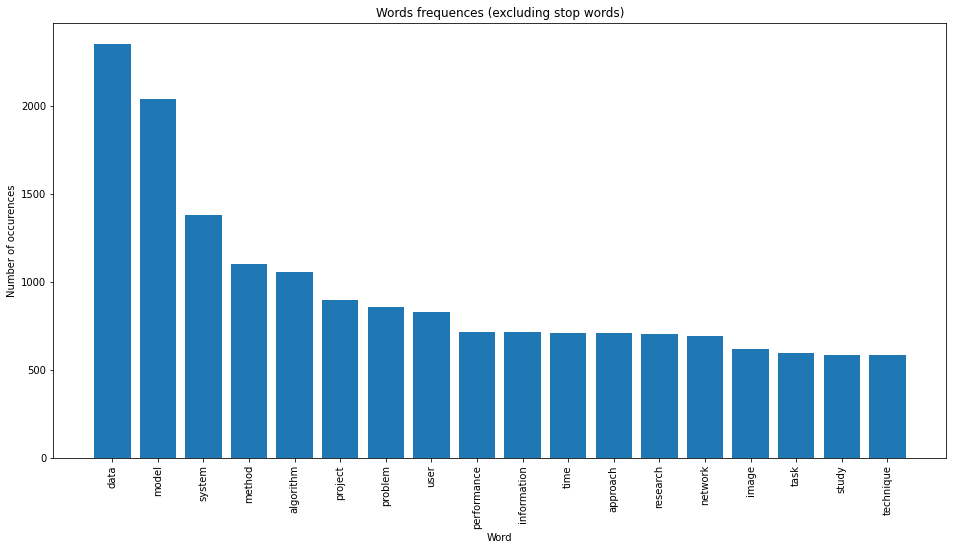

In [1533]:
show_plot(0, 18)

In [33]:
oooo = tokenized_docs.copy()

In [222]:
tokenized_docs = oooo.apply(lambda x : [word for word in x if word not in stopwords])

In [34]:
number_of_docs =  len(data.columns)
upper_percent = 45
lower_percent = 2

In [35]:
remove_words = {'user', 'xmlnsxlinkhttpwwwworgxlinkgtseenltigtn', 'method', 'approach', 'result', 'model', 'data', 'problem', 'solution', 
'concept', 'task', 'work', 'process', 'step', 'goal', 'entity', 'aim', 'set', 'return', 'query', 'type','mission', 'knowledge','object', 'part', 'improvement','policy','insight', 
'frame','enhancement', 'measure', 'extraction', 'increase','factor', 'event', 'retrieval', 'book', 'version', 'ability', 'view',
 'stage', 'level', 'hair', 'subset', 'issue', 'custom', 'interest', 'show', 'g', 'gan', 'na', 'match', 'lack', 'ifit', 'million',
 'art', 'occurrence', 'student', 'capability', 'case', 'finding'
 }

In [36]:
for i in vocab1:
    if ('http' in i) or ('url' in i):
        remove_words.add(i) 

In [1538]:
len(remove_words)

116

In [37]:
important_words = {'robotics', 'cnn', 'machinelearning', 'kmeans', 'linguistic', 'aerospace', 'aircraft', 'logistics', 'transport', 
'timeseries', 'artificial', 'telematics', 'tomography', 'bert', 'gameplay', 'medicine', 'gaming', 'detector', 'forecast', 'robotic', 'android',
'genetic', 'statistic', 'cybersecurity', 'nlp', 'modelling', 'convolutional', 'textual', 'photo', 'therapy', 'gene', 'surgery', 'disability',
'animation', 'injury', 'corpus', 'physician', 'ecommerce',  'cybersecurity', 'diagnostics', 'disorder',  'engineering', 'analyst', 'transport',
'car', 'medicine', 'processor', 'screening', 'interpretability', 'clustering', 'drone','clinical','driver', 'diagnosis', 'forecast',
'telecommunication'}

In [38]:
f = open('imp_words.txt', 'r')
for i in f.readlines():
    important_words.add(i.rstrip('\n'))
f.close()

In [ ]:
important_words

In [ ]:
k = 0
for word in words_frequences.keys():
    if words_frequences[word] >= number_of_docs * upper_percent / 100 or words_frequences[word] <= number_of_docs * lower_percent / 100:
        print(word, words_frequences[word])
        if word not in important_words:
            k += 1
            remove_words.add(word)
k

In [40]:
remove_words.update(adjectives)

In [1546]:
len(remove_words)

14651

In [1351]:
for i in adjectives:
    remove_words.add(i)

In [67]:
len(remove_words)

13762

In [66]:
for i in important_words:
    if i in remove_words:
        remove_words.remove(i)

In [45]:
f = open('unnecessary_words.txt', 'w')
for i in sorted(remove_words):
    f.write(i)
    f.write('\n')
f.close()

In [57]:
f = open('stem_words.txt', 'r')
stem_word = []
for i in f.readlines():
    if len(i) > 0 and i != '\n':
        i = i.strip("\n")
        i = i.strip(",")
        i = i.strip(" ")
        i = i.strip("'")
        stem_word.append(i) 
f.close()   

In [64]:
len(important_words)

988

In [63]:
important_words = set(list(important_words) + stem_word)

In [65]:
form_vocab()

In [1551]:
len(vocab1)

516

In [1353]:
remove_words.add('system')

In [44]:
tokenized_docs

0       [present, compilation, flow, generation, cnn, ...
1       [field, experiment, cotton, season, aldakahlia...
2       [rice, husk, adsorbent, removal, cd, aqueous, ...
3       [fungicidal, residue, copper, fungicide, coppe...
4       [study, heavy, metal, contamination, drinking,...
                              ...                        
2564    [end, user, business, document, letter, notice...
2565    [multiple, situation, crosslingual, lawyer, li...
2566    [recent, year, surge, interest, research, dire...
2567    [acculogic, stateoftheart, tester, electronic,...
2568    [casebank, service, chronicx, airline, industr...
Length: 2569, dtype: object

In [1605]:
form_vocab()

In [68]:
for i in range(len(tokenized_docs)):
    for j in remove_words:
        tokenized_docs[i] = list(filter(lambda a: a != j, tokenized_docs[i]))

In [71]:
ooo1 = tokenized_docs.copy()

In [1657]:
tokenized_docs

0       [flow, generative_modeling, cnn, inference, fl...
1       [field, experiment, product, behavior, field, ...
2       [effect, time, speed, reduction, efficiency, r...
3                      [value, rate, sample, day, effect]
4       [study, sample, sample, sample, source, sample...
                              ...                        
2564    [business, document, language, rule, informati...
2565    [document, analyst, mining, source, document, ...
2566    [year, researcher, direction, technology, comp...
2567    [order, test, amount, movement, test, efficien...
2568    [service, industry, purpose, resolution, serve...
Length: 2569, dtype: object

In [1612]:
words_frequences = calc_frequences() 

In [1385]:
len(vocab1)

7261

In [58]:
remove_words

{'document',
 'taskindependent',
 'putative',
 'qp',
 'occasion',
 'quant',
 'diagnostics',
 'regularizers',
 'onscreen',
 'urlhttpsgithubcomlrjconanlanczosnetwork',
 'hdfs',
 'lime',
 'matter',
 'analogue',
 'plant',
 'flagship',
 'cha',
 'errorrate',
 'url',
 'binarize',
 'traction',
 'subchallenge',
 'nonreproducible',
 'lessdefog',
 'intel',
 'virtualization',
 'studentteacher',
 'mole',
 'suction',
 'beamsearch',
 'mouth',
 'knob',
 'continuoustime',
 'qnetworks',
 'regulator',
 'simpliciter',
 'researchneural',
 'lexiconcommunicative',
 'poultry',
 'alma',
 'aw',
 'decisionsupport',
 'centroidal',
 'xraygamma',
 'rsim',
 'bddbased',
 'characteristic',
 'wellaligned',
 'investigation',
 'scratch',
 'midpoint',
 'query',
 'xltime',
 'inscribed',
 'factorssemantic',
 'missensevariant',
 'boyar',
 'textitsoft',
 'formirror',
 'extinction',
 'patternsuntangling',
 'ccre',
 'erstwhile',
 'nontrivialtoconstruct',
 'wrightfisher',
 'il',
 'httpsfidlerlabgithubioefficientannotationcookboo

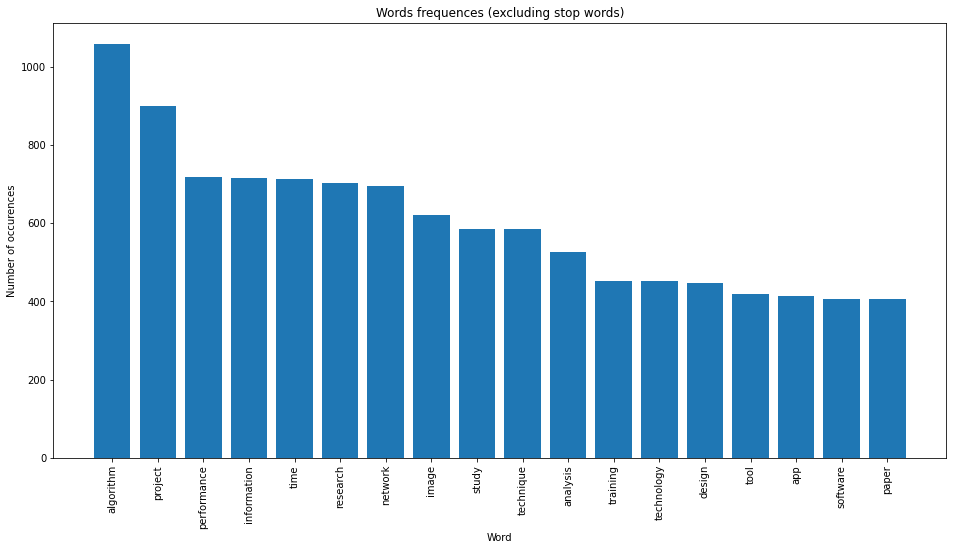

In [1554]:
show_plot(0, 18)

In [72]:
form_vocab()

In [77]:
same_base = {}
for word in list(vocab1):
    ok = False
    for i in same_base.keys():
        if word[:5] == i[:5]:
            same_base[i].append(word)
            ok = True
            break
    if ok is False:
        same_base[word] = []

In [ ]:
for key in same_base.keys():
    if len(same_base[key]) != 0:
        print(key, same_base[key])

In [62]:
for i in vocab1:
    if 'rein' in i:
        print(i)

reinforcement


In [1042]:
bad_keys = ['computer', 'artificial']  

In [79]:
same_base = {}
same_base['computing'] = ['computational', 'computer', 'computation']
same_base['math'] = ['mathrmslnmathbb', 'mathrmyr', 'mathrmacc', 'mathrmnphard', 'mathrmkpctimes', 'mathrmpolylog', 'mathrmpsnr', 'mathrmdb', 'mathrmeff', 'mathrmherdisc', 'mathrmchag', 'mathrmpolylogn', 'mathrmgpc']
same_base['algorithm'] =['algorithmsmodels', 'algorithmsclass', 'algorithmsfair', 'algorithm', 'algorithmic', 'algorithmdriven', 'algorithmiclevel', 'algorithmsprovide', 'algorithmswill', 'algorithmthe', 'algorithmsautomated', 'algorithmsdaveqn', 'algorithmics']
same_base['semantics'] = ['semanticallyinterpretable', 'semanticallyunderdefined', 'semanticallyrich', 'semantickitti', 'semanticallysmall', 'semantics']
same_base['text'] = ['textstatpm', 'textspecific', 'textscklaus']
same_base['telemetics'] = ['telemedicine', 'telematicsbased', 'telemetry']
same_base['network'] = ['networksonchip','networksensor', 'network', 'networkcentric', 'networkmultiobject', 'networkonchip', 'networking', 'networkingfacilitated', 'networklevel', 'networkcentrality', 'networktrust', 'networksthus', 'networkbased', 'networksmicroscopic', 'networkdrain', 'networksonchips']
same_base['benchmark'] = ['benchmarked', 'bench', 'benchmarktowards', 'benchmarking', 'benchmarkingis']
same_base['generative_model'] = ['generative_adversarial_network', 'generative_modeling', 'generative', 'generationnatural_language', 'generative_modelling', 'generation']
same_base['gameplay'] = ['gamebased','gameplaying','gamer','gamers','gamescene','gametheoretic','gamifications', 'gamified', 'gamify', 'gamification', 'gamifying']
same_base['dimensions'] = ['dimensionsdiverge', 'dimension', 'dimensional', 'dimensionwise', 'dimensionindependent', 'dimensionality', 'dimensionalityunderstanding']
same_base['clinicallyoriented'] = ['clinical', 'clinicalrelevant', 'clinicianled', 'clinicallyrelevant', 'clinicaltransparency', 'clinic', 'cliniciansdeveloping', 'clinicallyestablished', 'clinicalbiometric', 'clinicaladministrative', 'clinicallyspinal', 'clinicallyrelated', 'clinical', 'clinician', 'clinicaltrials', 'clinicallywith']
same_base['disease'] = ['diseasescores', 'diseasesingle', 'diseasespecific', 'diseasewhole', 'diseasethe', 'diseaseassociated', 'disease']

same_base['microcontroller'] = ['microcontrollers', 'microservices', 'microrobotic', 'microbenchmarks', 'microblogging', 'microbiological', 'microcomputer', 'microrobots', 'microprocessor']
same_base['parallel'] = ['parallelizable', 'parallelism', 'parallellism', 'parallelization', 'parallelizing', 'parallelized', 'parallelize']
same_base['business'] = ['businessbased', 'businessoperation', 'businessprocesses', 'businessindustrial', 'businesstobusiness', 'business']
same_base['environment'] = ['environmental', 'environmentrealtime', 'environment', 'environmentfree', 'environmentshttpssitesgooglecomviewleafexploration', 'environmentsince']
same_base['asymptomatic'] = ['asymptotic', 'asymptotics']
same_base['capacity'] = ['capacitive', 'capacity', 'capacitycentric', 'capacitor']
same_base['detection'] = ['detector']
same_base['math'] = ['mathbfa', 'mathbfw', 'mathbbfn', 'mathbfamathbfx', 'mathbfpnotsubseteqmathbfnc', 'mathbfx', 'mathbfamathbfw', 'mathbbqd', 'mathbbflinear', 'mathbbrn', 'mathbbrd']
same_base['statistic'] = ['statistician', 'statisticallybased', 'statistique', 'statistical', 'statistiques']
same_base['photo'] = ['photoproduction', 'photoplethysmography', 'photovoltaic', 'photorealistic', 'photonatom', 'photonefficient', 'photorealism', 'photomultiplier', 'photographic', 'photonnumber', 'photon', 'photoninduced', 'photonic', 'photograph', 'photometry', 'photo', 'photonprocessing', 'photonics', 'photometric', 'photography', 'photographer']
same_base['biology'] = ['biobank', 'biobased', 'biochemical', 'biochemistry', 'biocompatible', 'biocomputational', 'biodiversity', 'bioelectrical', 'biofuels', 'bioimage', 'bioinformatics', 'biologicallymeaningful', 'biologist', 'biology', 'biomarker', 'biomarkers', 'biomass', 'biomechanical', 'biomedical', 'biometric', 'biometrics', 'biomolecular', 'biomolecules', 'biophysical', 'biophysiological', 'bioprocessing', 'biopsy', 'bioscience', 'biosecurity', 'biosequence']
same_base['recommendation'] = ['recommendationsan', 'recommendationalways', 'recommenders', 'recommender', 'recommendation']
same_base['time'] = ['timeadaptive', 'timeaverage', 'timeaware', 'timecodestruct', 'timecoloring', 'timeconsistent', 'timeconstellation', 'timeconsuming', 'timecorrelated', 'timedelay', 'timedelayed', 'timedependent', 'timedomain', 'timeefficient', 'timeendtoend', 'timeevaluating', 'timeframe', 'timeframes', 'timefrequency', 'timeindependent', 'timeintegrated', 'timeintensive', 'timeinterval', 'timeless', 'timeline', 'timely', 'timemicroarray', 'timenatural_languagebased', 'timeofflight', 'timeofgame', 'timeonmarket', 'timeout', 'timeplay', 'timeresolved', 'timereversal', 'timescale', 'timescaledb', 'timescales', 'timeskhatrirao', 'timeslots', 'timesmatrix', 'timesofarrival', 'timestamp', 'timestepping', 'timesteps', 'timesthe', 'timestream', 'timetengrad', 'timethe', 'timetoaccuracy', 'timetoinsight', 'timevariable']

same_base['forecast'] = ['forecasting']
same_base['text'] = ['textitentanglement', 'textitsoft', 'textile', 'textitnp', 'textitfigurative', 'textitnphard', 'textitspitzer', 'textitmaximizing', 'textitexplanations', 'textitdeepfall', 'textitweight', 'textitconp', 'textitmonotone', 'textitsemimonotone', 'textitrelational']
same_base['electronics'] = ['electricity', 'electrical', 'electrogram', 'electricdiesel', 'electoral', 'electrochemical', 'electric', 'electronica', 'electrodynamics', 'electroproduction', 'electromyography', 'electrograms', 'electrooptic', 'electronphonon', 'electronion', 'electroretinogram', 'electron', 'electronic', 'electrocatalysts', 'electromagnetic']
same_base['neuronal'] = ['neuropathic', 'neurotechnologies', 'neurodevelopment', 'neuroradiologists', 'neuromodulation', 'neurology', 'neurogenesis', 'neurogenetic', 'neurodegenerative', 'neurological', 'neuroplasticity', 'neurovascular', 'neurotechnology', 'neurocognitive', 'neurodegeneration', 'neuron', 'neurologic']
same_base['encoding'] = ['encoders', 'encoderwhich', 'encoder']
same_base['bank'] = ['bankissued','banking']

same_base['analyzes'] = ['analyticallytractable', 'analyticalthe', 'analytic', 'analysestpmutation', 'analyser', 'analysesone', 'analytical', 'analyst', 'analyte', 'analyzer', 'analysisbysynthesis', 'analytics', 'analysishierarchical', 'analysis', 'analyzing', 'analysing']
same_base['autonomic'] = ['autonomous', 'autonomy']
same_base['image'] = ['imagebased','imagefitting', 'imagespace', 'imagevideo', 'imagetopatient', 'imagenet', 'imagenetk', 'imagelevel', 'imagepoint', 'image', 'imagetoimage', 'imageaction', 'imagesvideos', 'imager', 'imagenettrained', 'imagery']
same_base['reinforcement_learning'] = ['rl', 'reinforcement']
same_base['pipeline'] = ['pipelinessimatac', 'pipelining', 'pipelinebased', 'pipelineistandardize', 'pipeline', 'pipelined', 'pipelinesmodern']

same_base['analogy'] = ['analog', 'analogous', 'analogue', 'analogy', 'analogical', 'analoguescommunity']
same_base['radioactivity'] = ['radiotherapy', 'radiologist', 'radiomic', 'radiological', 'radiomics', 'radiopharmaceutical', 'radiology', 'radiofrequency', 'radioactive', 'radio']
same_base['graph'] = ['graphtheoretic', 'graphic', 'graphing', 'graphql', 'graphsthematic', 'graphclustering', 'graphcut', 'graphsvertex', 'graphical', 'graphtheoretical', 'graphbased']
same_base['epidemic'] = ['epidemicpandemic', 'epidemiologic', 'epidemiological']
same_base['geomatics'] = ['geocoding', 'geoelectrical', 'geofence', 'geofences', 'geofencing', 'geoffrey', 'geographic', 'geographical', 'geography', 'geolocalization', 'geolocation', 
'geological', 'geologist', 'geomagnetic', 'geomatics', 'geoscience', 'geoscientific', 'geospatial', 'geotab', 'geophysical', 'geophysics', 'geopolitical']
same_base['automation'] = ['automatique', 'automate', 'automotive', 'automatiquement', 'automated', 'automatizing', 'automatagame', 'automaton', 'automaticallygenerated', 'automation', 'automaticallyphased', 'automatic']
same_base['histogram'] = ['histology', 'history', 'histological']
same_base['crosslingual'] = ['crosslanguage', 'crosslinguistic']
same_base['randomness'] = ['random', 'randomized', 'randomuniform', 'randomization', 'randomworlds', 'randomsat', 'randomsamplingbased', 'randomgrid']

same_base['hardware'] = ['hardwaresystem', 'hardware', 'hardwarearchitecture', 'hardwarebased', 'hardwaresoftware']
same_base['linearlogistic'] = ['lineartime', 'linearizability', 'linearity', 'linearizable', 'linearblend']
same_base['electronics'] = ['smarthome', 'smart', 'smartphonebased', 'smartcase', 'smartphones', 'smartwatch', 'smartnics', 'smartphone', 'smartvehicle']
same_base['anonymous'] = ['anonymizing', 'anonymization', 'anonymityrelated', 'anonymized', 'anonymity']
same_base['memoryefficient'] = ['memorybandwidthsensitive', 'memory', 'memoryintensive', 'memorization', 'memoryless']
same_base['neural_network'] = ['neuralnetworkbased']
same_base['natural_language'] = ['natural_language_processing', 'nature']
same_base['physics'] = ['physicallybased','physicianpatient', 'physicsdriven', 'physiologist', 'physician', 'physiotherapy', 'physiological', 'physicsbased', 'physiochemical', 'physiology', 'physicochemical', 'physicallycorrected']

same_base['github'] = ['github', 'githubs']
same_base['cybernatics'] = ['cyberpunk', 'cyberattacks', 'cybernetic', 'cyber', 'cyberbullying', 'cybercars', 'cyberspace', 'cyberc', 'cybersecurity', 'cyberattack', 'cyberphysical']
same_base['quantumlogic'] = ['quantumoptical', 'quantumcomputers', 'quantum', 'quantumdot', 'quantumresistant']
same_base['math'] = ['mathbbflinear', 'mathbbfn', 'mathbbqd', 'mathbbrd', 'mathbbrn', 'mathbfa', 'mathbfamathbfw', 'mathematician', 'mathematics', 'mathematical', 'mathematic', 'mathbfamathbfx', 'mathbfpnotsubseteqmathbfnc', 'mathbfw', 'mathbfx', 'mathcalbdsto', 'mathcalh', 'mathcalm', 'mathcalon', 'mathcalop', 'mathcalt', 'mathematic', 'mathematical', 'mathematicalbased', 'mathematician', 'mathitsource', 'mathrmacc', 'mathrmchag', 'mathrmdb', 'mathrmeff', 'mathrmgpc', 'mathrmherdisc', 'mathrmkpctimes', 'mathrmnphard', 'mathrmpolylog', 'mathrmpolylogn', 'mathrmpsnr', 'mathrmslnmathbb', 'mathrmyr', 'mathsfnphard']
same_base['aeronautics'] = ['aeronautical']
same_base['computing'] = ['computationalproblem', 'computationallevel', 'computational', 'computationallybased', 'computable', 'computer_vision', 'computeintensive', 'computation', 'computability', 'computer', 'computationallyexpensive', 'computed', 'computing']

same_base['dermatology'] =['dermatologist', 'dermatologistlevel', 'dermatological']
same_base['economics'] = ['economical', 'economy', 'economist', 'economic', 'economicsmarketbased', 'econometrician']
same_base['atmospheric'] = ['atmosphere']
same_base['architect']= ['architecturestechnical', 'architectural', 'architectureneutral', 'architecture', 'architech', 'architechs']
same_base['machine_learning'] = ['machine', 'machinelearning']

same_base['chemist'] = ['chemistrymemoryoptimal', 'chemistry', 'chemical']
same_base['blockchain'] = ['blockchainbased', 'blockchains']
same_base['astrometric'] = ['astronomical', 'astrophysical', 'astrophysics']
same_base['ecology'] = ['ecologicallyvalid', 'ecological', 'ecologist']
same_base['anatomy'] = ['anatomicallydriven', 'anatomybased', 'anatomical']
same_base['cloud'] = ['cloudedge', 'cloudstyle', 'cloud', 'cloudbased', 'cloudlab', 'cloudiness']
same_base['patient'] =['patientreported', 'patientphysician', 'patient', 'patientspecific', 'patientsremote', 'patientclinician', 'patientcentric', 'patientcentered', 'patientdoctor']
same_base['ontological'] = ['ontology', 'ontologybased', 'ontologythe', 'ontologytupper']
same_base['lexical'] = ['lexiconcommunicative', 'lexicalization', 'lexiconevolution', 'lexiconword', 'lexicosyntactic', 'lexicographic', 'lexicon', 'lexicalist']

same_base['asteroid'] = ['asteroidal']
same_base['audio'] = ['audiodriven', 'audio', 'audiobook', 'audiovisual']

same_base['health'] = ['healthpolicymaking', 'healthcare', 'healthcarethe', 'healthy', 'healthvault', 'healthbx', 'healthdietary', 'health', 'healthrelated', 'healthrisk']
same_base['features'] =['featurestrt', 'featurebased', 'featureslinguistic', 'featureregistration', 'featureextraction', 'featurerich', 'featuresmight', 'featurefilm', 'feature', 'featured', 'featurepreserving']
same_base['language'] = ['languagebased']
same_base['deep_learning'] = ['deep_neural_network', 'deep_learningbased', 'deep_neural']

same_base['geometric'] = ['geometryfree', 'geometry', 'geometrical']
same_base['climatic'] = ['climateresilient', 'climate']
same_base['animation'] = ['animatorcentric', 'animationsystem', 'animator', 'animate', 'animated']
same_base['genomicc'] = ['genomicsrd', 'genome', 'genomic', 'genomics']
same_base['audit'] = ['auditing', 'auditable', 'auditai', 'auditor']
same_base['advertisement'] = ['advertising', 'advertiser', 'advertisementslearning']
same_base['mobile_app'] = ['mobile_device', 'mobile_application', 'mobilebased', 'mobile']
same_base['cosmology'] =  ['cosmological']
same_base['genotypic'] = ['genotypephenotype', 'genotype']
same_base['optimization'] = ['optimisation', 'optimizers', 'optimizer', 'optimizationbased']
same_base['bayesian'] = ['bayes', 'bayesnash', 'bayesball']
same_base['balance'] = ['balancedbatch', 'balancedraven', 'balanced', 'balancedness', 'balancing']
same_base['attackagnostic'] = ['attacker', 'attack', 'attacksengineering', 'attackssigvm']
same_base['grammar'] = ['grammatical', 'grammarian', 'grammaticality']

same_base['playergame'] = ['player']
same_base['chatbot'] = ['chatbotcustomer', 'chatbotsthat', 'chatbots']
same_base['diagnostics'] = ['diagnostic', 'diagnosis']

same_base['asynchrony'] = ['async', 'asyncasync', 'asynchronous']
same_base['codesign'] = ['codesigns', 'codestruct', 'codeswitched', 'codesigvm', 'codeswitching']
same_base['telecommunication'] = ['teleconferencecell']
same_base['autoencoding'] = ['autoencoders', 'autoencoder', 'autoencodingbased', 'autoencodercollision']
same_base['robotics'] = ['robotic', 'robot', 'robotcontrol']
same_base['ecological'] =['ecologicallyvalid', 'ecologist', 'ecopatch', 'ecopatches', 'ecosystem', 'ecosystemimagine']
same_base['linguistics'] = ['linguistic']
same_base['anomalous'] = ['anomalystable', 'anomaly']
same_base['artificial_intelligence'] = ['artificial_intelligencebased', 'artificialintelligencebased', 'artificial_intelligencepowered', 'artificial']
same_base['embeddings'] = ['embedding']
same_base['cluster'] = ['clustering']
same_base['deploy'] = ['deployment']
same_base['batching'] = ['batchlevel', 'batch', 'batchsize']

In [80]:
for i in range(len(tokenized_docs)):
    for j in range(len(tokenized_docs[i])):
        for key in same_base.keys():
            if tokenized_docs[i][j] in same_base[key]:
                tokenized_docs[i][j] = key

In [81]:
tokenized_docs[3]

['value', 'rate', 'sample', 'atomic', 'day', 'effect']

In [1700]:
more_words = []

In [275]:
more_words = []
f = open('delete_words.txt', 'r')
for i in f.readlines():
    s = ''
    for j in i:
        if j in 'abcdefghijklmnopqrstuvwxyz':
            s += j
        elif len(s) > 0:
            more_words.append(s)
            s = ''
f.close()

In [1391]:
more_words

['objective',
 'optimal',
 'challenging',
 'human',
 'practical',
 'private',
 'single',
 'multiple',
 'information',
 'recent',
 'predictive',
 'relationship',
 'objective',
 'present',
 'large',
 'stochastic',
 'probabilistic',
 'small',
 'information',
 'predictive',
 'contract',
 'equation',
 'execution',
 'complex',
 'efficient',
 'net',
 'control',
 'metric',
 'plane',
 'single',
 'challenging',
 'dram',
 'implicit',
 'adversary',
 'scheme',
 'message',
 'pair',
 'similar',
 'pair',
 'run',
 'critical',
 'literature',
 'concern',
 'outcome',
 'unknown',
 'risk',
 'p',
 'architecture',
 'construct',
 'challenging',
 'individual',
 'error',
 'classifier',
 'decision',
 'open',
 'efficient',
 'singlecell',
 'signature',
 'characterization',
 'challenging',
 'al',
 'body',
 'inverse',
 'polynomial',
 'success',
 'vector',
 'term',
 'key',
 'due',
 'reference',
 'line',
 'automatic',
 'human',
 'index',
 'dram',
 'present',
 'synthesis',
 'variational',
 'standard',
 'posterior',
 'as

In [276]:
r = ["style", "choice", 'participant',"complicated", 'project', 
'performance', 'time', 'item', 'completion', 'path', 
'difficulty', 'future_work', 'purpose', 'reason', 'attention', 'transfer', 
'area', 'change', 'scene', 'removal', 'output', 'address', 'state', 'article', 
'control', 'source', 'limitation', 'manner', 'year', 'removal', 'augmentation', 'world', 
'challenge', 'fence', 'obstruction', 'ground', 'condensate', 'ab', 'experience', 
'b', 'leverage', 'fluency', 'similarity', 'planning', 'extract', "question", "context","essay", 
"outcome", "educator", 'advance','failure', 'library', 'input', 'reconstruction', 'yield',
'utterance', 'okta', 'usage', 'cpc', 'possibility', 'theme',"contract", "node", 
"identification", "city", "inference", "gap", "way", "internship", "field","success",
"background","importance","capture","medium","point","goal_project","risk","impact","measurement",
"code", "amount", "size", "focus", "term", "range", "property", "history", "experimen", 
"people", "benefit", "technique","end","presence", "target", 'age', 'practice', 'variety', 
'profile', 'edge', 'relationship', 'map', 'module', 'accuracy', 'domain', 'feedback', 'partner', 
'skill', 'aspect', 'effect', 'additional', 'collection', 'action', 'study', 
'activity','thing','number','function','day', 'collection', 
'core', 'variation', 'company', "business",'scale', 'combination', 'access', 
'demand', 'person', 'framework', 'behavior', 'gain', 
'requirement', 'role', 'today', "quality", "generation", "hand", "response", 
"communication", "resource","error","order","life",'researcher',
'phase', 'rule', 'pattern', 'consumption', 'form', 'cost', 'research_project', 'information', 'technology', 'home', 'research',
'technical', 'interactive', 'scenario', 'tool', 'prediction', 'feature', 'development', 'product', 'tool', 'advanced', 'partner_organization',
'learning', 'training', 'data', 'user', 'project', 'research', 'model', 'paper', 'science', 'algorithm', 
'uncertainty','shape','modelling', 'preference', 'program', 'proof']
for i in r:
    if i not in more_words:
        more_words.append(i)

In [1654]:
tokenized_docs

0       [generative_modeling, cnn, compiler, hardware,...
1                                                [safety]
2                          [speed, reduction, efficiency]
3                                                      []
4                                                      []
                              ...                        
2564    [document, language, document, language, volum...
2565    [document, analyst, mining, document, translat...
2566    [computing, volume, text, textual, natural_lan...
2567    [efficiency, procedure, optimization, heuristi...
2568    [service, industry, resolution, server, text, ...
Length: 2569, dtype: object

In [277]:
for i in range(len(tokenized_docs)):
    for j in more_words:
        tokenized_docs[i] = list(filter(lambda a: a != j, tokenized_docs[i]))

In [274]:
for i in range(len(tokenized_docs)):
    for j in range(len(tokenized_docs[i])):
        if tokenized_docs[i][j] == 'ml':
            tokenized_docs[i][j] = 'machinelearning'
        elif tokenized_docs[i][j] == 'rl' or tokenized_docs[i][j] == 'reinforcement':
            tokenized_docs[i][j] = 'reinforcement_learning'
        elif tokenized_docs[i][j] == 'nlp' or tokenized_docs[i][j] == 'natural':
            tokenized_docs[i][j] = 'natural_language_processing'

In [278]:
tokenized_docs

0       [compilation, cnn, accelerator, fpgas, frozen,...
1       [cotton, season, aldakahlia, alfayoum, egypt, ...
2       [rice, husk, adsorbent, cd, aqueous, solution,...
3       [fungicidal, residue, copper, fungicide, coppe...
4       [heavy, metal, contamination, drinking, water,...
                              ...                        
2564    [document, letter, notice, statement, language...
2565    [situation, crosslingual, lawyer, litigation, ...
2566    [surge, interest, quantum, computing, quantum,...
2567    [acculogic, tester, electronic, circuit, board...
2568    [casebank, service, chronicx, airline, industr...
Length: 2569, dtype: object

In [273]:
tokenized_docs = tokenized_docs.apply(lambda x: x.split(' '))

In [82]:
for i in range(len(tokenized_docs)):
    tokenized_docs[i] = ["".join(y.split(' ')) for y in tokenized_docs[i]]

In [596]:
for i in range(len(tokenized_docs)):
    for j in more_words:
        tokenized_docs[i] = list(filter(lambda a: a != j, tokenized_docs[i]))

<h3> Topic modeling with LDA + BERT + KMEANS + TSNE </h3>

In [95]:
from gensim.corpora import Dictionary

In [280]:
num_of_topics = 80

In [1566]:
partial_file_name = '40topics_33'

In [88]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [364]:
tokenized_docs = tokenized_docs.apply(lambda x: " ".join(x))

In [226]:
tokenized_docs

0       present compilation flow generation cnn infere...
1       field experiment cotton season aldakahlia alfa...
2       rice husk adsorbent removal cd aqueous solutio...
3       fungicidal residue copper fungicide copper oxy...
4       study heavy metal contamination drinking water...
                              ...                        
2564    end user business document letter notice state...
2565    multiple situation crosslingual lawyer litigat...
2566    recent year surge interest research direction ...
2567    acculogic stateoftheart tester electronic circ...
2568    casebank service chronicx airline industry pur...
Length: 2569, dtype: object

In [227]:
prebert_tok_docs = tokenized_docs.apply(lambda x: "[CLS] " + x + " [SEP]")

In [228]:
bert_tokenized_docs = prebert_tok_docs.apply(lambda x: tokenizer.tokenize(x))

In [229]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(bert_tokenized_docs, show_progress_bar=True)

Batches:   0%|          | 0/81 [00:00<?, ?it/s]

In [282]:
from gensim.models import LdaModel
import numpy as np

tokenized_docs_splitted = tokenized_docs.apply(lambda x: x.split())
dictionary = Dictionary(tokenized_docs_splitted )
corpus = [dictionary.doc2bow(text) for text in tokenized_docs_splitted]
lda_model_bert = LdaModel(corpus=corpus, num_topics=num_of_topics,  id2word=dictionary) 
n_doc = len(corpus)
vec_lda = np.zeros((n_doc, num_of_topics))
for i in range(len(corpus)):
    for topic, prob in lda_model_bert.get_document_topics(corpus[i]):
        vec_lda[i, topic] = prob
        

In [285]:
lda_model_bert.print_topics(80)

[(0,
  '0.131*"system" + 0.022*"process" + 0.019*"machine" + 0.017*"file" + 0.016*"threat" + 0.014*"machinelearning" + 0.014*"detection" + 0.011*"service" + 0.011*"urban" + 0.010*"topic"'),
 (1,
  '0.024*"mobile_app" + 0.018*"game" + 0.015*"machine" + 0.013*"detection" + 0.012*"radiologist" + 0.012*"reinforcement_learning" + 0.011*"task" + 0.010*"camera" + 0.010*"artificial_intelligence" + 0.010*"method"'),
 (2,
  '0.034*"cyber" + 0.022*"insurance" + 0.018*"title" + 0.017*"game" + 0.013*"fabrication" + 0.011*"transit" + 0.011*"object" + 0.010*"disentanglement" + 0.009*"event" + 0.009*"intraoperative"'),
 (3,
  '0.060*"display" + 0.038*"employee" + 0.025*"cluster" + 0.024*"hdr" + 0.015*"gpu" + 0.014*"aim" + 0.014*"judgement" + 0.012*"saskatchewan" + 0.011*"colour" + 0.009*"knowledge"'),
 (4,
  '0.019*"injury" + 0.018*"technological" + 0.014*"maintenance" + 0.014*"network" + 0.013*"lake" + 0.011*"database" + 0.010*"position" + 0.009*"approach" + 0.009*"method" + 0.009*"task"'),
 (5,
  '0

In [139]:
gamma = 10
vec_ldabert = np.c_[vec_lda * gamma, embeddings]

In [1642]:
embeddings

array([[-0.51734996, -0.09346221,  0.64650387, ..., -0.3572003 ,
        -0.7831909 ,  0.21357031],
       [-0.59679204,  0.09656569,  0.3331629 , ..., -0.6503075 ,
         0.16937943, -0.36635813],
       [-1.0347154 , -0.3261643 ,  0.766173  , ..., -0.7582238 ,
        -0.22645457, -0.9879607 ],
       ...,
       [-0.8355199 ,  0.26788563,  0.46252146, ..., -0.77158844,
        -0.32342896, -0.3123475 ],
       [-0.685203  ,  0.0706325 ,  0.41727895, ..., -0.52951705,
         0.13085046, -0.18659739],
       [-0.46551043, -0.18246575,  0.04101897, ..., -0.17259674,
        -0.05166693, -0.08092766]], dtype=float32)

In [1179]:
vec_lda.shape

(1219, 50)

In [1178]:
embeddings.shape

(1219, 768)

In [1177]:
vec_ldabert.shape

(1219, 818)

<h2> KNN </h2>

In [108]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

model = NearestNeighbors(n_neighbors=1,
                         metric='cosine',
                         algorithm='brute',
                         n_jobs=-1)
model.fit(vec_ldabert[:1451])

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=1)

In [109]:
knn_predictions = pd.DataFrame(columns=['Proposal', 'Proposal abstract', 'Paper', 'Paper abstract', 'Distance', 'Prof'])
for i in range(1451, len(all_titles)):
    pred = model.kneighbors([vec_ldabert[i]])
    ind_of_proposed_paper = pred[1][0][0]
    knn_predictions = knn_predictions.append({'Proposal': all_titles[i], 'Proposal abstract': all_paper_abstracts[i], 'Proposal topic': kmeans_text_freqs[y.labels_[i]], 'Paper': all_titles[ind_of_proposed_paper], 'Paper topic': kmeans_text_freqs[y.labels_[ind_of_proposed_paper]], 'Paper abstract': all_paper_abstracts[ind_of_proposed_paper], 'Distance': pred[0][0][0], 'Prof': professors[ind_of_proposed_paper]}, ignore_index=True)

In [1598]:
all_paper_abstracts[1451]

'contextual bandit algorithms are developed to gain maximum rewards from an unknown distribution in limited trials by exploiting contextual information they can be adapted to yield solutions for adserving systems with a short campaign time several new contextual bandit algorithms have been proposed in recent years but their performance is poorly understood in real world scenarios this study tests these algorithms particularly the adaptivegreedy algorithm david cortes in multiple simulated and realworld datasets we found that the adaptive greedy algorithm can achieve up to clickthrough rate improvement compared to the widely used bootstrapped thompson sampling algorithm bts at the same time the adaptivegreedy algorithm can be up to times faster in training and predicting than the bts algorithm offpolicy evaluation ope which allows us to evaluate our new models from the log data generated by other policies provides vital backtesting results to inform new policy decisions to this end we s

In [1271]:
tokenized_docs[103]

'gameplay testing computing game graphic reinforcement_learning gameplay game game game game player game gameplay agent game environment image analysis computing vision observation agent neural_network processing optimization gameplay agent interaction gameplay gameplay setting efficiency game testing gameplay test automation reinforcement_learning'

In [1272]:
kmeans_text_freqs[y.labels_[103]]

{'patient': 23,
 'supplier': 17,
 'algorithm': 16,
 'search': 14,
 'transaction': 14}

In [1676]:
knn_predictions

,Proposal,Proposal abstract,Paper,Paper abstract,Distance,Prof,Paper topic,Proposal topic
0,adapting contextual bandit algorithms to adser...,contextual bandit algorithms are developed to ...,Adam: A Method for Stochastic Optimization,we introduce adam an algorithm for firstorder ...,0.000000e+00,Jimmy Ba,"{'algorithm': 92, 'graph': 12, 'optimization':...","{'algorithm': 92, 'graph': 12, 'optimization':..."
1,defending white box adversarial examples with ...,as deep neural networks become increasingly co...,Assurance Case Property Checking with MMINT-A ...,Assurance cases are a means to argue about the...,7.730460e-02,Marsha Chechik,"{'network': 13, 'fairness': 11, 'care': 9, 'al...","{'network': 13, 'fairness': 11, 'care': 9, 'al..."
2,modern gameplay test automation with reinforce...,gameplay testing on computer games to help ens...,Near-optimal Local Convergence of Alternating ...,smooth minimax games often proceed by simultan...,2.556336e-02,Roger Grosse,"{'game': 18, 'attack': 5, 'speech': 5, 'conver...","{'game': 18, 'attack': 5, 'speech': 5, 'conver..."
3,reducing data loading time in machine learning...,training of models in machine learning is typi...,Detecting Individual Decision-Making Style: Ex...,The advent of machine learning models that sur...,0.000000e+00,Ashton Anderson,"{'machinelearning': 74, 'image': 19, 'reliabil...","{'machinelearning': 74, 'image': 19, 'reliabil..."
4,hybrid recommender system for applications bas...,collaborative filtering is a widely used metho...,Mitigating the Filter Bubble while Maintaining...,Online recommendation systems are prone to cre...,0.000000e+00,Ashton Anderson,"{'algorithm': 70, 'analysis': 57, 'sample': 46...","{'algorithm': 70, 'analysis': 57, 'sample': 46..."
...,...,...,...,...,...,...,...,...
1113,multilingual semantic similarity of unstructur...,to communicate with their end users businesses...,Towards Automated Sexual Violence Report Tracking,tracking sexual violence is a challenging task...,5.554754e-02,Ishtiaque Ahmed,"{'algorithm': 70, 'analysis': 57, 'sample': 46...","{'algorithm': 70, 'analysis': 57, 'sample': 46..."
1114,multilingual semantic search engine using mult...,multiple situations require crosslingual searc...,Towards Automated Sexual Violence Report Tracking,tracking sexual violence is a challenging task...,5.554754e-02,Ishtiaque Ahmed,"{'algorithm': 70, 'analysis': 57, 'sample': 46...","{'algorithm': 70, 'analysis': 57, 'sample': 46..."
1115,revealing trends in quantum technology with na...,recent years have witnessed a surge of interes...,Code forking in open-source software: a requir...,to fork a project is to copy the existing code...,0.000000e+00,Steve Easterbrook,"{'algorithm': 100, 'gradient': 76, 'optimizati...","{'algorithm': 100, 'gradient': 76, 'optimizati..."
1116,adding extra constraints to an open platform f...,acculogic develops stateoftheart testers for s...,INT: An Inequality Benchmark for Evaluating Ge...,in learningassisted theorem proving one of the...,0.000000e+00,Jimmy Ba,"{'algorithm': 70, 'analysis': 57, 'sample': 46...","{'algorithm': 70, 'analysis': 57, 'sample': 46..."


In [110]:
knn_predictions.to_excel('knn_results8.xlsx')

In [1236]:
print(model.kneighbors([vec_ldabert[101]])[0][0])

[0.20621383]


In [1220]:
print(all_titles[68])

Scalable Approximations for Generalized Linear Problems


In [1209]:
all_titles[101]

'adapting contextual bandit algorithms to adserving platforms'

<h2> KMeans </h2>

In [123]:
from sklearn.cluster import KMeans

t = KMeans(n_clusters=num_of_topics)
y = t.fit(vec_ldabert)

In [ ]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(vec_ldabert)

In [ ]:
tsne_lda_centers = tsne_model.fit_transform(y.cluster_centers_)

In [1626]:
kmeans_labels = {i: [] for i in range(0, num_of_topics)}

for i in range(len(y.labels_)):
    kmeans_labels[y.labels_[i]].append([tsne_lda[i][0], tsne_lda[i][1]])

IndexError: index 1451 is out of bounds for axis 0 with size 1451

In [101]:
n = len(tokenized_docs)

In [1067]:
len(titles)

101

In [124]:
kmeans_texts = {i: [] for i in range(0, num_of_topics)}
kmeans_title = {i: [] for i in range(0, num_of_topics)}
kmeans_prof = {i: [] for i in range(0, num_of_topics)}
for i in range(n):
    kmeans_texts[y.labels_[i]].append("".join(tokenized_docs[i]))
for i in range(1451):
    kmeans_title[y.labels_[i]].append(titles[i])
    kmeans_prof[y.labels_[i]].append(professors[i])

In [125]:
kmeans_text_freqs = {i: {} for i in range(num_of_topics)}
for i in kmeans_texts.keys():
    for j in range(len(kmeans_texts[i])):
        key_words = kmeans_texts[i][j].split()
        for c in key_words:
            if kmeans_text_freqs[i].get(c) == None:
                kmeans_text_freqs[i][c] = 1
            else:
                kmeans_text_freqs[i][c] += 1


In [126]:
for i in kmeans_text_freqs:
    kmeans_text_freqs[i] = {k: v for k, v in sorted(kmeans_text_freqs[i].items(), key=lambda item: item[1], reverse=True)[:5]}

In [104]:
df_prof.iloc[[18]]

,Unnamed: 0,professor name,paper_abstract,title,date
18,18,Alán Aspuru-Guzik,bayesian optimization has emerged as a powerfu...,Gemini: Dynamic Bias Correction for Autonomous...,"4 March, 2021"


In [580]:
form_vocab()

In [127]:
kmeans_text_freqs

{0: {'recognition': 46,
  'features': 44,
  'photo': 43,
  'language': 38,
  'machine_learning': 31},
 1: {'customer': 60,
  'attackagnostic': 35,
  'music': 27,
  'galaxy': 23,
  'gradient': 17},
 2: {'word': 95, 'graph': 80, 'network': 27, 'voice': 22, 'interface': 21},
 3: {'quantumlogic': 80,
  'generative_model': 77,
  'computing': 27,
  'tree': 23,
  'image': 18},
 4: {'disease': 64,
  'patient': 29,
  'health': 18,
  'detection': 18,
  'diagnostics': 14},
 5: {'reinforcement_learning': 120,
  'optimization': 85,
  'agent': 49,
  'memoryefficient': 30,
  'space': 27},
 6: {'health': 144,
  'patient': 26,
  'analyzes': 22,
  'clinicallyoriented': 21,
  'graph': 16},
 7: {'network': 243,
  'image': 47,
  'architect': 24,
  'neural_network': 21,
  'optimization': 17},
 8: {'service': 96,
  'network': 55,
  'computing': 43,
  'security': 40,
  'database': 35},
 9: {'software': 155,
  'analyzes': 23,
  'industry': 20,
  'customer': 11,
  'features': 10},
 10: {'series': 50,
  'geometr

In [1253]:
y.labels_.shape

(1219,)

<h3> Finding similarities between each pair of Prof. papers </h3>

In [111]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

dist_df = pd.DataFrame(columns=['Professor A', 'Professor B', 'Title A', 'Title B', 'Topic A', 'Topic B', 'Distance between A and B'])

for i in range(1431):
    for j in range(i + 1, 1431):
        if professors[i] == professors[j]:
            break
        topic1 = ", ".join(list(kmeans_text_freqs[y.labels_[i]].keys()))
        topic2 = ", ".join(list(kmeans_text_freqs[y.labels_[j]].keys()))
        dist_df = dist_df.append({'Professor A': professors[i], 
                        'Professor B': professors[j],
                        'Title A':titles[i], 
                        'Title B': titles[j], 
                        'Topic A': topic1,
                        'Topic B': topic2, 
                        'Distance between A and B': cosine_distances([list(vec_ldabert[i])], [list(vec_ldabert[j])])[0][0]}, ignore_index=True)
#dist_list = sorted(dist_list, key = lambda x: x[2]) 
dist_df

,Professor A,Professor B,Title A,Title B,Topic A,Topic B,Distance between A and B
0,Tarek Abdelrahman,Ishtiaque Ahmed,Fast On-the-fly Retraining-free Sparsification...,RacketStore: Measurements of ASO Deception in ...,"network, ontological, series, analyzes, semantic","optimization, simulation, gradient, network, m...",0.154321
1,Tarek Abdelrahman,Ishtiaque Ahmed,Fast On-the-fly Retraining-free Sparsification...,Understanding the Social Determinants of Menta...,"network, ontological, series, analyzes, semantic","mental, health, classification, language, anal...",0.198991
2,Tarek Abdelrahman,Ishtiaque Ahmed,Fast On-the-fly Retraining-free Sparsification...,Mental Health and Sensing,"network, ontological, series, analyzes, semantic","mental, health, classification, language, anal...",0.257854
3,Tarek Abdelrahman,Ishtiaque Ahmed,Fast On-the-fly Retraining-free Sparsification...,Ethical Analysis on the Application of Neurote...,"network, ontological, series, analyzes, semantic","analyzes, visualization, anatomy, trend, segme...",0.404818
4,Tarek Abdelrahman,Ishtiaque Ahmed,Fast On-the-fly Retraining-free Sparsification...,Towards Automated Sexual Violence Report Tracking,"network, ontological, series, analyzes, semantic","machine_learning, quantumlogic, computing, aut...",0.275499
...,...,...,...,...,...,...,...
77226,Benjamin Haibe-Kains,Andrea Tagliasacchi,Stochastic Combinatorial Ensembles for Defendi...,Neural Descriptor Fields: SE(3)-Equivariant Ob...,"neural_network, network, memoryefficient, dete...","robotics, simulator, simulation, automation, g...",0.345216
77227,Michael Hoffman,Andrea Tagliasacchi,Algorithms for Stable Matching and Clustering ...,D$^2$NeRF: Self-Supervised Decoupling of Dynam...,"analyzes, geometric, network, features, computing","image, camera, generative_model, imaging, network",0.238332
77228,Michael Hoffman,Andrea Tagliasacchi,Algorithms for Stable Matching and Clustering ...,Panoptic Neural Fields: A Semantic Object-Awar...,"analyzes, geometric, network, features, computing","network, ontological, series, analyzes, semantic",0.212524
77229,Michael Hoffman,Andrea Tagliasacchi,Algorithms for Stable Matching and Clustering ...,Scene Representation Transformer: Geometry-Fre...,"analyzes, geometric, network, features, computing","computing, animation, cybernatics, graph, secu...",0.257242


In [114]:
len(all_paper_abstracts)

2569

<h3> Find paper for each proposal with min cosine similarity </h3>

In [142]:
min_cosine_sim = pd.DataFrame(columns=['Proposal title', 'Paper title', 'Professor', 'Paper abstract', 'Proposal abstract'])
for proposal_ind in range(1451, 1551):
    min = 10000
    res = 0
    for paper_ind in range(1431):
        d = cosine_distances([list(embeddings[proposal_ind])], [list(embeddings[paper_ind])])[0][0]
        if d < min:
            min = d
            res = {'Proposal title': all_titles[proposal_ind], 'Paper title': all_titles[paper_ind], 'Professor': professors[paper_ind], 
            'Paper abstract': all_paper_abstracts[paper_ind], 'Proposal abstract': all_paper_abstracts[proposal_ind], 'Cosine distance': d}
    min_cosine_sim = min_cosine_sim.append(res, ignore_index=True)

<h3> Find similarities between proposals and papers using TF-IDF, BERT, LDA </h3>

In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(tokenized_docs)

In [297]:
from sklearn.metrics.pairwise import cosine_similarity

def find_sim_tf_idf(query):
    query_tfidf = vectorizer.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf,  tf_idf[:1451]).flatten()
    print(cosineSimilarities)
    print(cosine_similarity(query_tfidf,  tf_idf[:1451]))
    cosineSimilarities = [(cosineSimilarities[i], i) for i in range(len(cosineSimilarities))]
    return sorted(cosineSimilarities, reverse=True)[0]

In [294]:
def find_sim_bert(ind):
    cosineSimilarities = []
    for i in range(1451):
        cosineSimilarities.append((cosine_similarity([embeddings[ind]],  [embeddings[i]]).flatten(), i))
    return sorted(cosineSimilarities, reverse=True)[0]

In [288]:
def find_sim_lda(ind):
    cosineSimilarities = []
    for i in range(1451):
        cosineSimilarities.append((cosine_similarity([vec_lda[ind]],  [vec_lda[i]]), i))
    return sorted(cosineSimilarities, reverse=True)[0]

In [207]:
beg_proposals = 1451 
end_proposals = len(all_titles)

In [256]:
find_sim_bert(1451)

(array([[1.]], dtype=float32), 1136)

In [235]:
find_sim_tf_idf(tokenized_docs[1452])

(0.29690858446489343, 179)

In [267]:
tf_idf_sim = pd.DataFrame(columns=['Proposal title', 'Paper title', 'Professor', 'Distance', 'Proposal abstract', 'Paper abstract'])
for i in range(beg_proposals, end_proposals):
    res = find_sim_tf_idf(tokenized_docs[i])
    similarity = res[0]
    paper_ind = res[1]
    dicti = {'Proposal title': all_titles[paper_ind], 'Paper title': all_titles[i], 'Professor': professors[paper_ind],
                'Distance': similarity, 'Proposal abstract': all_paper_abstracts[i], 'Paper abstract': all_paper_abstracts[paper_ind]}
    tf_idf_sim = tf_idf_sim.append(dicti, ignore_index=True)

In [268]:
tf_idf_sim

,Proposal title,Paper title,Professor,Distance,Proposal abstract,Paper abstract
0,Fair algorithms for multi-agent multi-armed ba...,adapting contextual bandit algorithms to adser...,Nisarg Shah,0.309972,contextual bandit algorithms are developed to ...,We propose a multi-agent variant of the classi...
1,Stochastic Combinatorial Ensembles for Defendi...,defending white box adversarial examples with ...,Benjamin Haibe-Kains,0.296909,as deep neural networks become increasingly co...,many deep learning algorithms can be easily fo...
2,Using a serious game to measure executive func...,modern gameplay test automation with reinforce...,Mark Chignell,0.255724,gameplay testing on computer games to help ens...,"In previous research, we developed a serious t..."
3,Allocation of graphics processing units for vi...,reducing data loading time in machine learning...,Eyal de Lara,0.298376,training of models in machine learning is typi...,"The present disclosure provides systems, metho..."
4,Where To Next? A Dynamic Model of User Prefere...,hybrid recommender system for applications bas...,Ashton Anderson,0.234358,collaborative filtering is a widely used metho...,We consider the problem of predicting users’ p...
...,...,...,...,...,...,...
1113,A qualitative study of large-scale recommendat...,multilingual semantic similarity of unstructur...,Kelly Lyons,0.236210,to communicate with their end users businesses...,The frequency at which new research documents ...
1114,Simple Search Algorithms on Semantic Networks ...,multilingual semantic search engine using mult...,Suzanne Stevenson,0.221202,multiple situations require crosslingual searc...,recent empirical and modeling research has foc...
1115,Noise robustness and experimental demonstratio...,revealing trends in quantum technology with na...,Alán Aspuru-Guzik,0.295300,recent years have witnessed a surge of interes...,the potential advantage of machine learning in...
1116,RDTCheck: A Smartphone App for Monitoring Rapi...,adding extra constraints to an open platform f...,Alex Mariakakis,0.202627,acculogic develops stateoftheart testers for s...,Rapid diagnostic tests are point-of-care medic...


In [263]:
bert_sim = pd.DataFrame(columns=['Proposal title', 'Paper title', 'Professor', 'Distance', 'Proposal abstract', 'Paper abstract'])
for i in range(beg_proposals, end_proposals):
    res = find_sim_bert(i)
    similarity = res[0][0][0]
    paper_ind = res[1]
    dicti = {'Proposal title': all_titles[paper_ind], 'Paper title': all_titles[i], 'Professor': professors[paper_ind],
                'Distance': similarity, 'Proposal abstract': all_paper_abstracts[i], 'Paper abstract': all_paper_abstracts[paper_ind]}
    bert_sim = bert_sim.append(dicti, ignore_index=True)

In [290]:
lda_sim = pd.DataFrame(columns=['Proposal title', 'Paper title', 'Professor', 'Distance', 'Proposal abstract', 'Paper abstract'])
for i in range(beg_proposals, end_proposals):
    res = find_sim_lda(i)
    similarity = res[0][0][0]
    paper_ind = res[1]
    dicti = {'Proposal title': all_titles[paper_ind], 'Paper title': all_titles[i], 'Professor': professors[paper_ind],
                'Distance': similarity, 'Proposal abstract': all_paper_abstracts[i], 'Paper abstract': all_paper_abstracts[paper_ind]}
    lda_sim = lda_sim.append(dicti, ignore_index=True)

In [313]:
embeddings.shape

(2569, 768)

<h3> Word2Vec </h3>

In [537]:
from gensim.models import Word2Vec as w2v

model = w2v(
    tokenized_docs_splitted   
)       

def get_words_emb(i):
    vector = []
    #print(i)
    print(tokenized_docs_splitted[i])
    for word in tokenized_docs_splitted[i]:
        if word in model.wv.key_to_index.keys():
            vector.append(np.array(model.wv.get_vector(word)))
        else:
            vector.append(np.zeros(100))
    #print(vector[0], i)
    res = vector[0]
    for i in vector:
        res = sum([res, i])
    return res / len(vector)
#get_words_emb(0)


In [538]:
get_words_emb(0)

['compilation', 'cnn', 'accelerator', 'fpgas', 'frozen', 'opencl', 'compiler', 'intel', 'opencl', 'sdk', 'fpga', 'bitstream', 'hardware', 'optimization', 'opencl', 'tvm', 'optimization', 'parallelism', 'memory', 'latency', 'increase', 'concurrency', 'onchip', 'optimization', 'tvm', 'accelerator', 'lenet', 'mobilenetv', 'resnet', 'intel', 'stratixsx', 'optimization', 'accelerator', 'accelerator', 'accelerator', 'tensorflow', 'cpu', 'singlethreaded', 'tvm', 'x', 'tvm', 'thread', 'approach', 'highlevel', 'functionality', 'flexibility', 'approach', 'handoptimized', 'approach', 'preproduction', 'fpgas', 'hardware', 'expertise', 'compilation', 'cnn', 'accelerator', 'fpgas']


array([-0.08560264,  0.24182819,  0.15235931, -0.15576133, -0.04332603,
       -0.36297152,  0.099535  ,  0.35856078, -0.25549824, -0.10164585,
       -0.02847412, -0.14938039,  0.01605961,  0.20433939, -0.03047312,
       -0.21627009,  0.11305619, -0.13511639, -0.13055056, -0.26676909,
        0.02270136, -0.00695797,  0.09721748, -0.1128166 , -0.10993125,
       -0.0746083 , -0.19640352, -0.14499679, -0.2313989 ,  0.00528345,
        0.14141577, -0.05447735,  0.0882923 , -0.28868511,  0.09748937,
        0.17350421, -0.09160543, -0.17242725,  0.01362136, -0.3938158 ,
        0.10597823, -0.17885064, -0.08699917,  0.12936826,  0.21992958,
        0.0014013 , -0.18963911, -0.03683728,  0.05802372,  0.04064506,
        0.1064007 , -0.14403379, -0.1690649 , -0.10852294, -0.15906767,
        0.01226508,  0.04349418, -0.06009843, -0.12406991, -0.02759611,
       -0.01059265,  0.1846727 , -0.0797941 ,  0.05044988, -0.1688873 ,
        0.18682617,  0.1134216 ,  0.10122992, -0.29064831,  0.23

In [534]:
s = []
s.append(np.zeros(100))
s

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [514]:
r = get_words_emb(1451)

In [513]:
r1 = get_words_emb(1452)

In [519]:
cosine_similarity([r], [r1])[0][0]

0.9995685817596337

In [523]:
def find_sim_word2vec(ind):
    cosineSimilarities = []
    for i in range(1451):
        cosineSimilarities.append((cosine_similarity([get_words_emb(ind)],  [get_words_emb(i)])[0][0], i))
    return sorted(cosineSimilarities, reverse=True)[0]

In [540]:
all_titles[616]

'Sequential Explanations with Mental Model-Based Policies'

In [ ]:
find_sim_word2vec(1451)

In [ ]:
word2vec_sim = pd.DataFrame(columns=['Proposal title', 'Paper title', 'Professor', 'Distance', 'Proposal abstract', 'Paper abstract'])
for i in range(beg_proposals, end_proposals):
    res = find_sim_word2vec(i)
    similarity = res[0]
    paper_ind = res[1]
    dicti = {'Proposal title': all_titles[i], 'Paper title': all_titles[paper_ind], 'Professor': professors[paper_ind],
                'Distance': similarity, 'Proposal abstract': all_paper_abstracts[i], 'Paper abstract': all_paper_abstracts[paper_ind]}
    word2vec_sim = word2vec_sim.append(dicti, ignore_index=True)

In [353]:
embeddings[0].shape

(768,)

In [358]:
t = get_words_emb(0)
t1 = get_words_emb(5)
t1.shape

C:\Users\Марія\AppData\Local\Temp\ipykernel_25608\2647560396.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vector = np.array(vector)


(70, 100)

<h3> Doc2Vec Embeddings </h3>

In [437]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_docs_splitted)]

In [469]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 700, window = 2, min_count = 1, epochs = 500)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary


'\nvector_size = Dimensionality of the feature vectors.\nwindow = The maximum distance between the current and predicted word within a sentence.\nmin_count = Ignores all words with total frequency lower than this.\nalpha = The initial learning rate.\n'

In [468]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("my_doc2vec_model")

model.save(fname)

In [444]:
all_titles[664]

'Fair algorithms for multi-agent multi-armed bandits'

In [457]:
def find_sim_doc2vec(ind):
    result = 0
    test_doc_vector = model.infer_vector(tokenized_docs_splitted[ind])
    result = model.docvecs.most_similar(positive = [test_doc_vector])
    for ih in result:
        if ih[0] < 1451:
            return ih
    return (0,0)

In [470]:
doc2vec_sim = pd.DataFrame(columns=['Proposal title', 'Paper title', 'Professor', 'Distance', 'Proposal abstract', 'Paper abstract'])
for i in range(beg_proposals, beg_proposals + 108):
    res = find_sim_doc2vec(i)
    dicti = dict()
    if res is None:
        dicti = {'Proposal title': all_titles[i], 'Paper title': 'none', 'Professor': 'none',
                'Distance': 'none', 'Proposal abstract': all_paper_abstracts[i], 'Paper abstract': 'none'}
    else:
        similarity = res[1]
        paper_ind = res[0]
        dicti = {'Proposal title': all_titles[i], 'Paper title': all_titles[paper_ind], 'Professor': professors[paper_ind],
                    'Distance': similarity, 'Proposal abstract': all_paper_abstracts[i], 'Paper abstract': all_paper_abstracts[paper_ind]}
    doc2vec_sim = doc2vec_sim.append(dicti, ignore_index=True)

In [471]:
doc2vec_sim.to_excel('similarities_doc2vec1.xlsx')  

<h3> Universal Sentence Encoder </h3>

In [473]:
pip install tensorflow_hub

You should consider upgrading via the 'c:\Users\Марія\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [474]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [475]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [477]:
sentence_embeddings = model(tokenized_docs)

In [484]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [491]:
def find_universal_sentence_encoder(ind):
  max = 0
  query_vec = model([tokenized_docs[ind]])[0]
  for i, sent in enumerate(tokenized_docs[:1451]):
    sim = cosine(query_vec, model([sent])[0])
    if sim > max:
      max = sim
      res = (i, sim)
  return res

In [488]:
all_titles[1451]

'adapting contextual bandit algorithms to adserving platforms'

In [487]:
res

'Boosting for Online Convex Optimization'

In [ ]:
use_sim = pd.DataFrame(columns=['Proposal title', 'Paper title', 'Professor', 'Distance', 'Proposal abstract', 'Paper abstract'])
for i in range(beg_proposals, beg_proposals + 25):
    print(i)
    res = find_universal_sentence_encoder(i)
    similarity = res[1]
    paper_ind = res[0]
    dicti = {'Proposal title': all_titles[i], 'Paper title': all_titles[paper_ind], 'Professor': professors[paper_ind],
                'Distance': similarity, 'Proposal abstract': all_paper_abstracts[i], 'Paper abstract': all_paper_abstracts[paper_ind]}
    use_sim = use_sim.append(dicti, ignore_index=True)

In [496]:
use_sim.to_excel('similarities_use_sim.xlsx') 

<h3> Calculating average distance between papers for each professor </h3>

In [1129]:
gb = dist_df.groupby(['Professor A'])
s = set()
average_sim_profs = pd.DataFrame(columns=['Professor A', 'Average sim'])
for i in professors:
    if i in gb.groups.keys() and i not in s:
        s.add(i)
        average_sim_profs = average_sim_profs.append({'Professor A': i, 'Average sim': np.average(dist_df.loc[gb.groups[i]]['Distance between A and B'])}, ignore_index=True)
average_sim_profs    

,Professor A,Average sim
0,Frank Rudzicz,0.310686
1,Marsha Chechik,0.288756
2,Michael Brudno,0.321960
3,Murat Erdogdu,0.277639


In [1130]:
average_sim_profs.to_excel('average_sim_profs_' + partial_file_name + '.xlsx')  

In [143]:
min_cosine_sim.to_excel('100_proposals_BERT_basic_cleaning.xlsx')  

In [269]:
tf_idf_sim.to_excel('similarities_TF-IDF.xlsx')  

In [265]:
bert_sim.to_excel('similarities_BERT.xlsx')  

In [291]:
lda_sim.to_excel('similarities_LDA.xlsx')  

In [112]:
partial_file_name = 'test1'

In [113]:
dist_df.to_excel('distances_' + partial_file_name +'.xlsx')

In [965]:
len(vocab1)

28

In [966]:
len(remove_words)

14584

In [967]:
len(set(more_words))

569

In [971]:
f = open('words_remove.txt', 'w')
for i in remove_words:
    f.write(i)
    f.write('\n')
f.close()

In [968]:
set(more_words)

{'ab',
 'access',
 'accuracy',
 'accurate',
 'acquisition',
 'action',
 'activation',
 'activity',
 'adaptive',
 'addition',
 'additional',
 'address',
 'advance',
 'advantage',
 'adversary',
 'age',
 'al',
 'algorithm',
 'alternative',
 'amount',
 'analysis',
 'annotation',
 'app',
 'application',
 'approximation',
 'arbitrary',
 'architecture',
 'area',
 'array',
 'article',
 'aspect',
 'assessment',
 'association',
 'assumption',
 'attention',
 'audience',
 'augmentation',
 'automatic',
 'autonomous',
 'average',
 'b',
 'background',
 'bandwidth',
 'base',
 'baseline',
 'behavior',
 'belief',
 'benefit',
 'bias',
 'big',
 'body',
 'bottleneck',
 'bound',
 'boundary',
 'broad',
 'building',
 'business',
 'c',
 'canada',
 'candidate',
 'capacity',
 'capture',
 'care',
 'cell',
 'central',
 'chain',
 'challenge',
 'challenging',
 'change',
 'channel',
 'characteristic',
 'characterization',
 'child',
 'choice',
 'city',
 'class',
 'classical',
 'classifier',
 'client',
 'close',
 'coco

<h3> Topics of papers </h3>

In [1273]:
new_df = pd.DataFrame(columns=['Professor', 'Title', 'Content', 'Topic'])
for i in range(101):
    new_df = new_df.append({'Professor': professors[i], 'Title': titles[i], 'Content': paper_abstracts[i], 'Topic': ", ".join(list(kmeans_text_freqs[y.labels_[i]].keys()))}, ignore_index=True)
new_df    

,Professor,Title,Content,Topic
0,Frank Rudzicz,Relevance in Dialogue: Is Less More? An Empiri...,we present a compilation flow for the generati...,"classifier, language, sentiment, representatio..."
1,Frank Rudzicz,Detoxifying Language Models with a Toxic Corpus,Field experiments were carried on cotton durin...,"classifier, language, sentiment, representatio..."
2,Frank Rudzicz,Doctor XAvIer: Explainable Diagnosis on Physic...,Rice husk was used as an adsorbent for the rem...,"classifier, language, sentiment, representatio..."
3,Frank Rudzicz,On the data requirements of probing,the fungicidal residues of certain copper fung...,"recommendation, decision, algorithm, location,..."
4,Frank Rudzicz,Improving greedy core-set configurations for a...,This study explored the heavy metals contamina...,"network, image, security, application, algorithm"
...,...,...,...,...
96,Fanny Chevalier,"Sketchnote components, design space dimensions...",Cluster computing frameworks such as Apache Ha...,"industry, blockchain, infrastructure, computin..."
97,Fanny Chevalier,Supporting Reference Imagery for Digital Drawing,The rapid growth of spatiotemporal Big Data is...,"app, device, management, player, safety"
98,Fanny Chevalier,Evaluating the Gradual Delivery of Knowledge-f...,"Storage systems rely on maintenance tasks, suc...","patient, supplier, algorithm, search, transaction"
99,Fanny Chevalier,Interactive Exploration and Refinement of Faci...,measuring graph clustering quality remains an ...,"patient, supplier, algorithm, search, transaction"


In [1274]:
new_df.to_excel('prof_topics_of_papers_' + partial_file_name + '.xlsx')

In [654]:
form_vocab()

In [657]:
vocab1

{'activation',
 'adaptive',
 'advantage',
 'agent',
 'aircraft',
 'alternative',
 'amount',
 'android',
 'animation',
 'annotation',
 'arbitrary',
 'area',
 'array',
 'article',
 'artificial',
 'assessment',
 'assumption',
 'attack',
 'autoencoders',
 'average',
 'b',
 'bayesian',
 'benchmark',
 'benefit',
 'bert',
 'binary',
 'bit',
 'blockchain',
 'bound',
 'broad',
 'camera',
 'cancer',
 'capture',
 'care',
 'category',
 'choice',
 'clinical',
 'cloud',
 'clustering',
 'cnn',
 'collection',
 'combination',
 'comparison',
 'competitive',
 'compound',
 'compression',
 'computing',
 'concurrent',
 'connection',
 'consistent',
 'constant',
 'contribution',
 'convolutional',
 'core',
 'corpus',
 'correlation',
 'covid',
 'cybersecurity',
 'database',
 'day',
 'decomposition',
 'deep',
 'deep_learning',
 'deep_neural_network',
 'definition',
 'degree',
 'density',
 'deployment',
 'detail',
 'detection',
 'detector',
 'deterministic',
 'digital',
 'dimension',
 'direct',
 'direction',
 'di

In [653]:
tokenized_docs = tokenized_docs.apply(lambda x: x.split())

<h3> Finding all topics for professor </h3>

In [1134]:
topics_prof_df = pd.DataFrame(columns=['Professor', 'Topic'])
topics_prof_unique = {i: set() for i in professors}
for i in range(101):
    topic = ", ".join(list(kmeans_text_freqs[y.labels_[i]].keys()))
    if topic not in topics_prof_unique[professors[i]]:
        topics_prof_unique[professors[i]].add(", ".join(list(kmeans_text_freqs[y.labels_[i]].keys())))
        topics_prof_df = topics_prof_df.append({'Professor': professors[i], 'Topic': topic}, ignore_index=True)
topics_prof_df

,Professor,Topic
0,Frank Rudzicz,"network, language, device, platform, detection"
1,Frank Rudzicz,"classifier, natural_language_processing, senso..."
2,Frank Rudzicz,"customer, recommendation, service, network, ap..."
3,Frank Rudzicz,"patient, machinelearning, health, customer, app"
4,Frank Rudzicz,"patient, health, healthcare, care, treatment"
5,Frank Rudzicz,"image, camera, algorithm, classifier, recognition"
6,Frank Rudzicz,"algorithm, network, clustering, machinelearnin..."
7,Frank Rudzicz,"machinelearning, drug, image, document, algorithm"
8,Frank Rudzicz,"service, organization, database, app, security"
9,Frank Rudzicz,"algorithm, security, threat, machinelearning, ..."


In [1135]:
topics_prof_df.to_excel('SUMMARY_prof_topics_' + partial_file_name +'.xlsx')

In [121]:
import math

def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [205]:
prof_areas = {}
for i in professors_centers.keys():
    min_d = 100000
    res = ''
    for j in kmeans_centers.keys():
        min_d1 = calculate_distance(professors_centers[i][0], professors_centers[i][1], kmeans_centers[j][0], kmeans_centers[j][1])
        if min_d1 < min_d:
            min_d = min_d1
            res = list(kmeans_text_freqs[j].keys())
    prof_areas[i] = res

In [206]:
prof_areas 

{'Tarek Abdelrahman': ['algorithm',
  'optimization',
  'potential',
  'computing',
  'network',
  'transformation',
  'system',
  'performance',
  'video',
  'framework'],
 'Ishtiaque Ahmed': ['sequential',
  'system',
  'performance',
  'algorithm',
  'computing',
  'transformation',
  'cloud',
  'human',
  'critical',
  'framework'],
 'Ashton Anderson': ['stochastic',
  'algorithm',
  'framework',
  'optimization',
  'neural_network',
  'gradient',
  'bayesian',
  'weight',
  'estimate',
  'graph'],
 'Alán Aspuru-Guzik': ['word',
  'semantic',
  'language',
  'text',
  'lexical',
  'transformation',
  'category',
  'meaning',
  'linguistic',
  'english'],
 'Jimmy Ba': ['stochastic',
  'algorithm',
  'framework',
  'optimization',
  'neural_network',
  'gradient',
  'bayesian',
  'weight',
  'estimate',
  'graph'],
 'Fahiem Bacchus': ['word',
  'semantic',
  'language',
  'text',
  'lexical',
  'transformation',
  'category',
  'meaning',
  'linguistic',
  'english'],
 'Ravin Balakri

In [155]:
professors_keywords = {professors[i]: [] for i in range(0, len(professors))}
for i in range(len(y.labels_)):
    professors_keywords[professors[i]].append(kmeans_text_freqs[y.labels_[i]])

In [156]:
professors_keywords

{'Tarek Abdelrahman': [{'gradient_descent': 52,
   'generative_model': 26,
   'graph': 26,
   'compression': 17,
   'node': 14},
  {'device': 62, 'design': 46, 'vehicle': 29, 'language': 23, 'movement': 22},
  {'speed': 8, 'network': 7, 'run': 6, 'value': 6, 'movement': 5},
  {'design': 15,
   'network': 12,
   'generative_model': 10,
   'demonstration': 8,
   'image': 8},
  {'density': 31,
   'algorithm': 20,
   'transaction': 20,
   'length': 14,
   'system': 14},
  {'signature': 26,
   'recognition': 18,
   'synthesis': 17,
   'activation': 16,
   'system': 13},
  {'algorithm': 51,
   'system': 32,
   'estimate': 30,
   'performance': 29,
   'classifier': 28}],
 'Ishtiaque Ahmed': [{'algorithm': 48,
   'optimization': 29,
   'gradient_descent': 18,
   'measurement': 8,
   'framework': 8},
  {'health': 38, 'monitoring': 7, 'detector': 6, 'system': 6, 'disease': 5},
  {'health': 38, 'monitoring': 7, 'detector': 6, 'system': 6, 'disease': 5},
  {'density': 31,
   'algorithm': 20,
   't

In [157]:
def get_words(ind):
    s = ' '
    count = 0
    for k in kmeans_text_freqs[ind].keys():
        s += k + ", "
        count += 1
        if count == 10:
            s.rstrip(', ')
            break
    return s

In [158]:
c1 =  ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
        "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
        "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
        
        "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
        "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
        "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
        "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
        "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C",
        "#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800",
        "#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51",
        "#C895C5", "#320033", "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58"]

In [692]:
len(c1)

128

In [159]:
import csv

# open the file in the write mode
f = open('pr_kmeans_bert_lda_9.csv', 'w')

# create the csv writer
writer = csv.writer(f)
writer.writerow(['Professor', 'Title', 'x', 'y', 'Topic'])


27

In [163]:
from utils.cleaner import TextCleaner
cleaner1 = TextCleaner()

In [164]:
for i in kmeans_title.keys():
    kmeans_title[i] = [cleaner1.text_cleaning(j) for j in kmeans_title[i]]

In [165]:
num_of_topics

50

In [180]:
titles = titles.apply(lambda x: cleaner1.text_cleaning(x))

In [ ]:
doc_topics = []
se = set()
for i in range(num_of_topics):
    topic = get_words(i)
    print(len(kmeans_labels[i]), len(kmeans_title[i]))
    for j in range(len(kmeans_labels[i])):
        p = {}
        
        if kmeans_title[i][j] in list(titles) and (kmeans_title[i][j] not in se):
            p['Professor'] = kmeans_prof[i][j]
            p['Topic'] = topic
            se.add(kmeans_title[i][j])
            p['Title'] = kmeans_title[i][j]
            p['Doc_keywords'] = kmeans_texts[i][j]
            doc_topics.append(p)

In [183]:
df2 = pd.DataFrame(doc_topics)

In [184]:
df2

,Professor,Topic,Title,Doc_keywords
0,Jimmy Ba,"programming, classifier, generative_model, sy...",generating images from captions with attention,programming generative_model image language wo...
1,Michael Brudno,"programming, classifier, generative_model, sy...",genomicsrd an integrated platform to share can...,programming understanding genetic disease disc...
2,Marsha Chechik,"programming, classifier, generative_model, sy...",annotative software product line analysis usin...,programming software product line product line...
3,Amir-massoud Farahmand,"programming, classifier, generative_model, sy...",classificationbased approximate policy iterati...,programming reinforcement_learning iteration f...
4,Azadeh Farzan,"programming, classifier, generative_model, sy...",and the axes of generalization,programming programming advantage
...,...,...,...,...
1310,Animesh Garg,"robot, simulation, cloud, application, genera...",disect a differentiable simulation engine for ...,robot application procedure area robot simulat...
1311,Alec Jacobson,"robot, simulation, cloud, application, genera...",neural shape mating selfsupervised object asse...,robot application cloud category pair cloud co...
1312,Florian Shkurti,"robot, simulation, cloud, application, genera...",catch the ball accurate highspeed motions for ...,robot array robot framework component optimiza...
1313,Michael Gruninger,"robot, simulation, cloud, application, genera...",qualitative spatial ontologies for robot dynamics,robot agent activation robot robot component d...


In [185]:
excel_file = 'pf_sheet_kmeans_bert_lda_9.xlsx'
df2.to_excel(excel_file) 

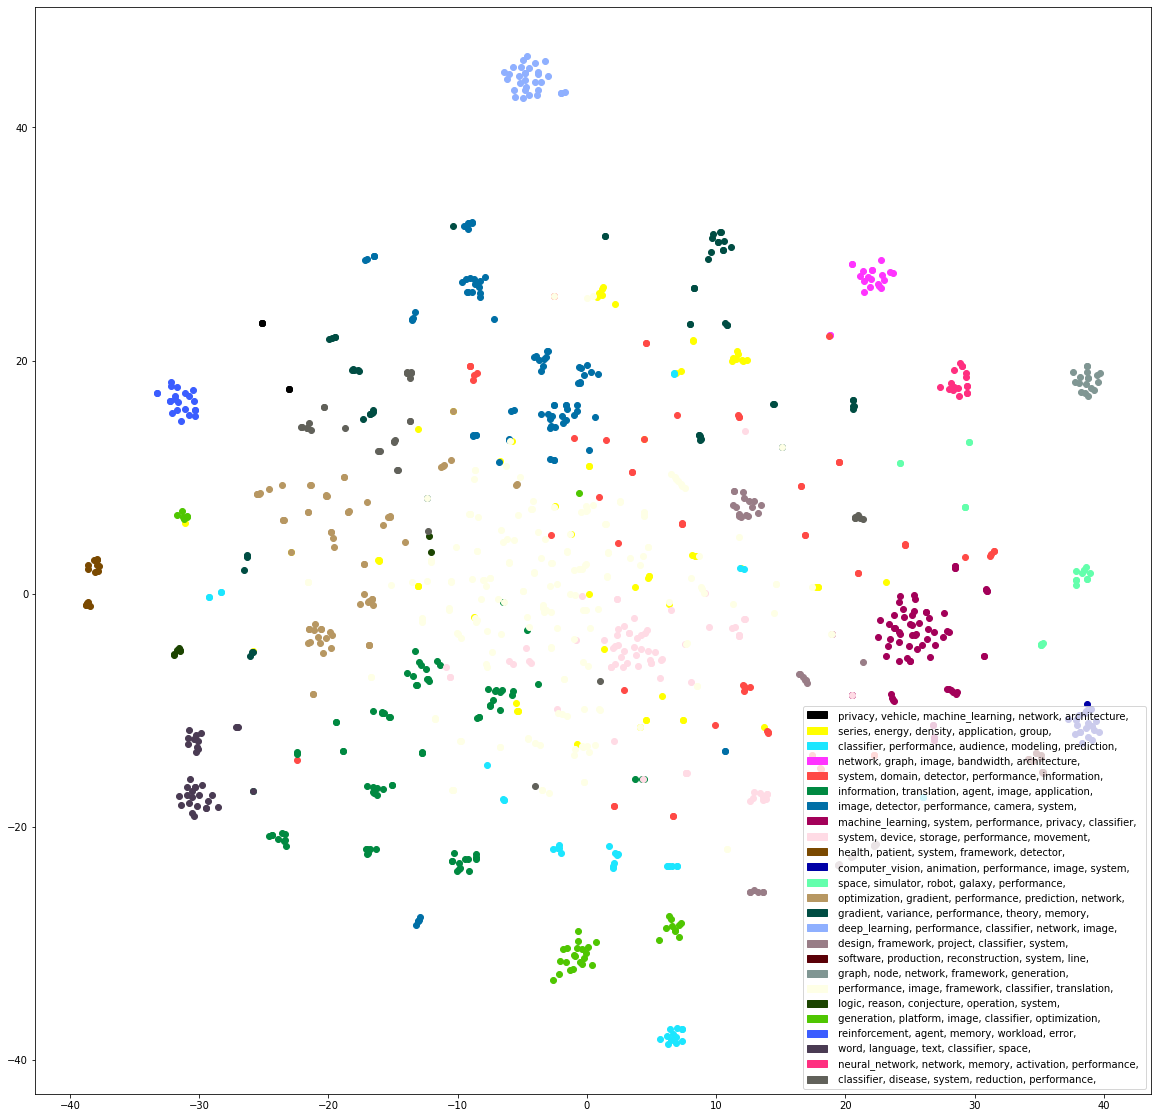

In [250]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize = (20,20))
patches = []
for i in range(num_of_topics):
    topic = get_words(i)
    patch = mpatches.Patch(color=c1[i], label=topic)
    patches.append(patch)
    for j in range(len(kmeans_labels[i])):
        if kmeans_prof[i][j] in list(professors):
            ax.scatter(kmeans_labels[i][j][0], kmeans_labels[i][j][1], color=c1[i])
    ax.legend(handles=patches, loc=4)

In [196]:
from utils.cleaner import TextCleaner

c = TextCleaner()

In [197]:
titles = titles.apply(lambda x: c.text_cleaning(x))

In [199]:
for i in kmeans_title.keys():
    kmeans_title[i] = [c.text_cleaning(j) for j in kmeans_title[i]]

In [ ]:
kmeans_title

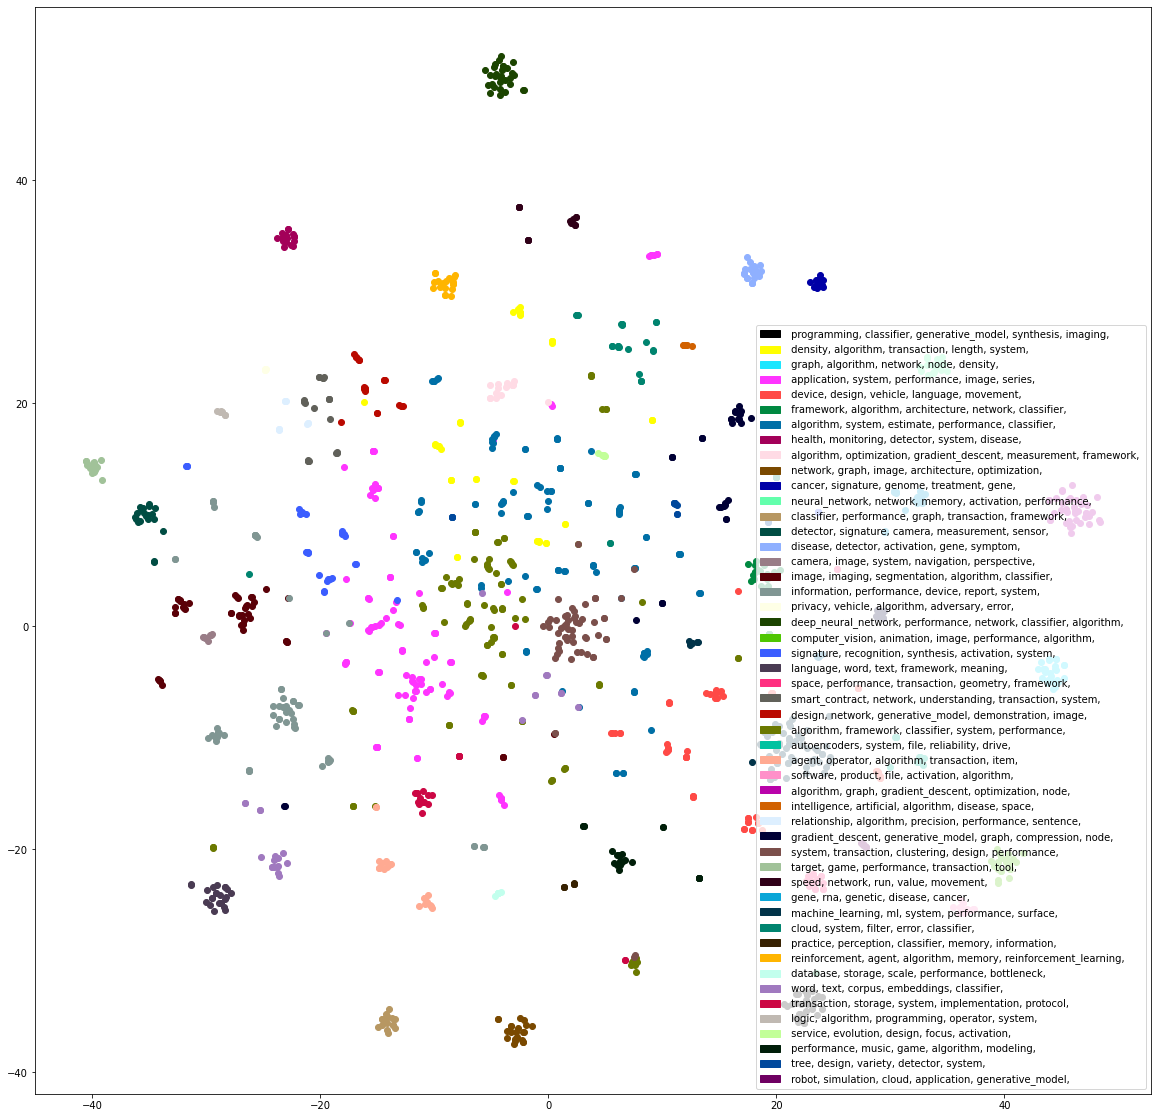

In [186]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize = (20,20))
patches = []
for i in range(num_of_topics):
    topic = get_words(i)
    patch = mpatches.Patch(color=c1[i], label=topic)
    patches.append(patch)
    for j in range(len(kmeans_labels[i])):
        if kmeans_title[i][j] in list(titles):
            ax.scatter(kmeans_labels[i][j][0], kmeans_labels[i][j][1], color=c1[i])
            writer.writerow([kmeans_prof[i][j], kmeans_title[i][j], kmeans_labels[i][j][0], kmeans_labels[i][j][1], topic])
    ax.legend(handles=patches, loc=4)
f.close()